### CS6493 Natural Language Processing Assignment 1
Student Name: CHEN Shiwei \
ID: 56708605 \
Contact: shiwechen6-c@my.cityu.edu.hk

In [1]:
from IPython import display
from base64 import b64decode

#### Question 1
(**11 marks**) We could represent the word with one-hot encoding in a language model instead of ascii representations.That is, we represent the word $w$ with:
$$\lVert V \rVert = \operatorname{length}\big([0,0,\dots,1,\dots,0,0]\big)$$
where $V$ is our vocabulary and $\lVert V \rVert$ is the size of it.

**Q1a.** Suppose we have a vocabulary {buy, bought, girl, woman, word, words}, please represent each word using the one-hot encoding. (**3 marks**)


**My answer**:
Given a a vocabulary size, the one-hot vectors should be the of length 6. Assign the encoding sequentially, we have: $$\begin{align*}\text{bug} &= [1,0,0,0,0,0] \\ \text{bought} &= [0,1,0,0,0,0] \\ \text{girl} &= [0,0,1,0,0,0] \\ \text{woman} &= [0,0,0,1,0,0] \\ \text{word} &= [0,0,0,0,1,0] \\ \text{words} &= [0,0,0,0,0,1] \end{align*}$$


**Q1b.** Combined with the previous question, what are the drawbacks of doing so? Answer at least two reasons. (**4 marks**)

**My answer**: There are a couple issues with one-hot encodings:
- The size of the encoding grows linearly with the size of the corpus. Sparsity means expensive computation.    
- Each vector representation is equivalent in one-hot encoding, in other words, no contextual/semantic information provided.

**Q1c.** Given a vocabulary {girl, woman, boy, man}, consider a computation unit with 4 nodes, when we use the one-hot approach to encode the word “girl”:

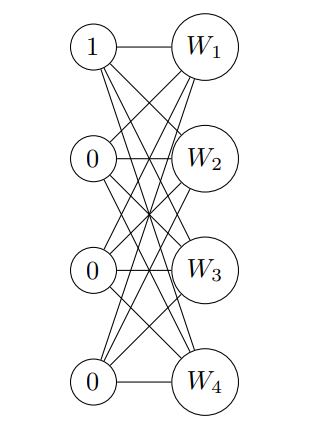

In [2]:
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAUQAAAG4CAYAAAA9up6kAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAHYcAAB2HAY/l8WUAAGE0SURBVHhe7Z0JnI3V/8dnzGL52ZOS0GIZOxGKLCEk2fctxppQSaSSNqLslBYSsmXLlh/KlkRSlixlLXuUnyWmmfl///dzPKeu6z73Pst57tz7zPf9es2L89xrZtyZ+3k+n3O+53uiiGEYhhGwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDIMw2iwIDKMHy5fvkwbN26kMWPGUMeOHenRRx+lWrVqUZUqVahSpUpUvXp1qlevHjVv3pyGDh1KS5cupVOnTmn/molUWBAZxsPx48dp8uTJ9MQTT1DJkiUpLi5O/Nm5c2eaMGECzZs3T4jemjVr6Msvv6QVK1bQggULaNq0adS/f3+qWrUqZcmShfLnz09NmjShN954g7Zu3ap9diZSYEFk0jXr16+nFi1aUNasWally5Y0evRo4QzhEM2SkpJCu3btoqlTp1Lv3r0pX758VLFiRZo+fTpdu3ZNexYTzrAgMumOK1eu0Pvvv0+lS5emggUL0ogRI+j333/XHlXH33//TXPnzqVq1apRnjx5aPDgwXTs2DHtUSYcYUFk0g3/93//J+Jvrly5qHbt2rR48WLh6kLBDz/8QImJiZQtWzYRy//880/tESacYEFk0gVHjhyhmjVrUtmyZen777/Xroaec+fOUadOncRc4xdffKFdZcIFFkTG9SAewxW+/PLLIsaGA59//jndfvvt1K1bN7p48aJ2lUlrWBAZ14KVY5TGlChRgr777jvtavgAt9i6dWsqVKgQffXVV9pVJi1hQWRcyaFDh8SCyYABA8J+hXf+/Pl0yy23iNIeJm1hQWRchxTDkSNHalfCn2+//ZZFMQxgQQwBWFFEQe8HH3xA48ePp1GjRtG4cePE3Nbq1avpjz/+0J7J2CUSxVDCopj2sCA6AAQQux7atm1LhQsXpvj4eCpfvjy1adOGunbtSr169RJ/4vH77rtPPH7vvfeKxydOnMgCaZFIFkMJi2LawoKoEOxS6N69u6g1a9SoEU2aNEls3wo2h4XHt23bJkS0cePG4t9j9XHnzp3aM5hgnD59OuLFUCJFcfny5doVJlSwICpg79699PDDD4tf4ueff17UvNnh6NGjNGjQILG7oUaNGrRnzx7tEUYP3Ej69OmjjSKf//73v3Tbbbc5soOG0YcF0QapqaliPjBHjhzCmfz111/aI2q4evUqvfPOO5QzZ0566623QrarItKYMWOGmJrAljw30bNnT7G/mgkdLIgW+eWXX+jBBx+k+++/XzhEJ9m/fz9VrlxZtJ76+eeftasMOHHihHDmX3/9tXbFPVy6dInuvvtunk8MISyIFsBcYd68eem1116j5ORk7aqzwB2++eabdOutt9KPP/6oXWUaNGggag3dyrp168TPHHOkjPOwIJpEiuGHH36oXQkt6L/HongdtNkqXry4mFpwM/369RNzpIzzsCCaIK3FUMKiSMKZo0EC+hm6HcyNorciN5x1HhZEg1y4cIHuvPNOUUwdDsAd3XHHHem2ZhHb3VDDmV545ZVXxFEGjLOwIBoEreTD7RcSffXat2+vjdIXONMEN4X0wsmTJ0VX77Nnz2pXGCdgQTQAztJAPAu3pp7StS5atEi7kj5AwTpWlt0+d+gLdjLhrBbGOVgQg4BIivmbcG3mKQt40UoqvYDdQCiAT2+gtAg3QK5HdQ4WxCDgjhzuxbFwDsOGDdNG7gYuHVsbsZvHLHsnt6QKJROoWEJJKl22LJUuWZyKFS1KCeVb0uS9msikHKKpHStQyYRilFCiNJUtW4ZKlUigosWKU7mGI2lb0vWngdTTcymx7L1UuGgClShVhsqU8ny+hCo0YOUl7RnqwZ54nPbHOAMLYgCwkok7ssqi3+TjG2ju6oOk8h6Pva9wseHSDdpJsJiCowAsk3qW5ra5jTJERVFssR605MhlStUeuoELyymxYAxFRcXQnW1m0MHLfp9FdPUUbXqlGmXLXISav7OGDus9TxHynGjGGVgQA/DZZ5+JO7IKUi8epC8/eJpq3RFHGRtOpQvadVVgx8ycOXO0kXtBVLYXl5Np59DyFOcRxPjqo+mInn6l7KfhVeI8ghhHFV7d7flXeqTS0cnNqdHoPeRlHh0DN2fUXjLOwIIYADRW+Oijj7SRFa7SyuerU4Vy5alynZbUq10lypkhSgii6uUZnP2Lw9LdDppo4EZlnVT6dXwtivcIYlzpF+k7PaVLPUJjqsd7BDGWCvffoC92f6ygvi1fpx2hUEMPqElEuzhs62PUw4KoAxYpMmbMaLthQ9KlC3RFy8fXViTSHQ4JIlqIZc6c2dVbvHCMKBpp2O0mdHlmU8oSHUUxBXrSap3ObJc3PEflssZRdFQGuqXjYs+tzR/XaOvQlvTs2tAeEoXzpNNDQXpawIKow6pVq0QMVYmTgggeeOABV/fQO3DggGiJZperyxMpn+fnEJ2tJc311yAneTeNatebhnQqRDFR0bo/r5QDE6l9t9l00tlpw5vo0qWL6ILEqIcFUQesLvfu3VsbqcFpQezbt6+rV5s//fRTql+/vjayTtI3AykhNoqi4uvQ5FO+auaJ1NMTKXHaYdoxtJyYa4yrOooO+q6CpZ6meT3a0fj9oS+Beffdd8VpfYx6WBB1aNKkifKdEE4L4ieffEKPPfaYNnIfWEwZMmSINrJOyv4RVCXOI4hxFem1PT6C9ucKerr9SNqV7BHGcTXFXGNsycG01WeO8NK6gdRq6Lc6UdpZsKe5WLFi2ohRCQuiDjgrV3XzBKcF8aeffhL7m91Kjx49aPTo0drIBuc+oPoZPYIYW5j6b/RWumu0dVhbemHDZTG6NLPJ9bnG/N3pC++5xuRdNKJNP1qeRtvI0YsTh9wz6mFB1AHFv2g+qhKnBfHMmTNiYcWtoP4OcdE2Vz6jtjmjKSpDHuq4+F+Pl/LLJOrcZyGd0VL01eVd6XbMNWZtRp9e10gPqXR0ahfq+vEx//WLvlw+Taf+VBurf/vtN7G4xKiHBVGHuLg45Z1knBbEixcvUnR0NI0YMUI0k3XbR7169ejjjz/W/rc2uPYlPXlXDEVFZ6SGU7WfROppmt+7C0059K94JW1+joqJucaHaeIJTf7OL6W+bUfR7oB9gVPoypl9tH7mK9SieC6qGLCO0TyyAoJRDwuiDrGxscqbOTgtiKhNgyD2799fLLC47aNOnTqi3tI2yT/Q0HLXi66rjrq+a+jSusHU4Y0dntD8Lyn7hlNlMddYgYbtgqRdpS1DW9NgLVL75xqtH96G2nZ/gcZ9MpCqxcdR+aE/KhXE8+fPi1pERj0siDqg1RJaLqnEaUFEa6hMmTJpI/fRoUMHeu+997SRDVKP0dia14uuSwzaSknJu2hkx4G0xnf70Nn3qR7mGmPuob7rkyhl/3jq8ORCOmu0zObix9Qoo3pBPH78OGXPnl0bMSphQdQB7b5UH//ptCCiTg+db9wKutxgL699LtGMJpkpOiqG8ndbTr9M6069Zp+8eU7wynxqI+Yac1P7BUdodo/ON0TqoDgkiAcPHnT1zzktYUHUoWHDhuJ4S5U4LYizZ88W82xuBYdJvfzyy9rIDldpWRc0eIimLHUTqXeXCeS3nPDaWupdCA0e4qlmYk9q6xOpg+KQIG7fvl0cu8qohwVRB7Rsx+E+KnFaEJ999ll68cUXtZH7wPxho0aNtJEdkmjzgKIUGxVF0ZnK04tbdKoJk3fQy2Ux1xhNcUWfujlSB8MhQcSZPs2aNdNGjEpYEHVYtmyZOHdZJVc9gogtYxkf/cgRQURb/cWLF2sj94E6S7Q5s08K7XuzEsV5IvNdictIt5Yg9SiNqRHvicy3U8tZfiJ1MBwSRNRjopKAUQ8Log5okoCaPnU9BlPpxPuPUrboKIq7/1Xarbg7Cno3YiEIE+5uJTU1Vdn/8eyURyhTnsY09VggmbtInzTOQtlrjvEfqYPhkCDicK01a9ZoI0YlLIgBqFSpks0eg8n04+imVOn++6lCmSKU/5ZclCsXPnJTvntKUwXP9ftrvkBrTU1M+Udl78Zw5qGHHlLigpN3zaLRi4I16k2hAwvG0dyfLP6AHBBEdDVCyU24ne/jFlgQA4C9wapjs1Okl1PonnnmmciZJ3VAELGPmRdUnIMFMQC4G+Ng+h07dmhXwhMcoJ9eTqHDSvojjzyijcKcPz6iRz2CWObF7coEcdKkSdS2bVttxKiGBTEI6K6C/nPhTLdu3dLNKXTYr415xFOnTmlXwo1k2jO1D7Vu1ZIaP1SMbsuVi3IXqkANmrWklu1G0kab0yNILKrLwZh/YUEMAt54cF8qD5pSyZYtWyh37tyuXkzxBYfzp5dTBr1BUkFiQXJhnIEF0QC4IxcpUkScZxFO4HiDokWL0rRp07Qr6QPcBNLLKYPedO3aVUk/SEYfFkSDNG7cWHmhtl2wwIAdNemRihUr0ty5c7WR+0FDB7SkQ+svxjlYEA2CusRbb72VFi1apF1JWz7//HNxvojqBhSRAtqApYdTBiUjR47k3SkhgAXRBJhHxHxdWu8GWbp0qahnTM8nr2FFHTcE7Ot1O5gauOuuu2jdunXaFcYpWBBNsmnTJiFGaSWKEMOcOXOKA7CwOyU9g+MEEJ3d/joMHTqUatasqY0YJ2FBtIAUxffff1+7EhpQeI2v+9///pdq1aolIlR6FkVs5UNsfv3117Ur7gMOGD/zw4cPa1cYJ2FBtAh+URMSEqhBgwaOl7xgnhCLJ8WKFaNt27aJa1jxZlG8fuASHLPqA8HCAZTXlCxZkqZMmaJdYZyGBdEGmMdCjz7UKWKb3//93/9pj6gBn2/WrFlirgwryiiz8YZF8ToTJkygsmXLuq4MZ9CgQZGzK8clsCAqAIstuJPfe++9Yl7L7sb7Cxcu0NixY8WeVbjCjRs3ao/cDIvi9RsHXoOXXnpJuxL5yIJ7LrMJLSyICkFLpscff1zUi6HdPTrQHD16VHs0MMeOHaMFCxZQz549xXkZaIT6zjvvULly5YI6TxZFoiNHjoiyKCWn8qUx+/btE4XnSAdMaGFBdAC8OdHqHiKF83PxRq1fvz49/fTT9MILL4htZ/gTY8xBYjsWRBDPb9OmzT9t8rFoAIdopPaRRZHEPGKki6IUw8mTJ2tXmFDCgugwcHc4/Al3e6yGYusV5h0hiK+99hrNnDmT9u/f/48L3Lx5s6g5k+DfGXGJgEWRaOXKlWLONRJFkcUw7WFBDDMgfHfeeec/q8lmXCJIz6KIFWe8dpjHjTSnyGIYHrAghiE4aH7gwIHayJxLBOlRFL3FEMj4/Pbbb4ubSjiDHUcshuEBC2IY4hubzbpEkJ5E0VcMJXBdFSpUEMcO4CzjcANlVGgYgog/f/587SqTlrAghiG+sRmYdYkgPYiinhhK8P/GXC2Kt9Ft2szr5yTffPONaCmHaoLwbXab/mBBDFN8Y7MVlwjcLIrBxNCbH374gcqUKUO1a9c2XArlBCjmx88VNYY4Z5oJL1gQwxTf2AysuETgRlE0I4aSpKQkcUAVjiBo166dcGmhAgXWqDBAiRVKrbjgOjxhQQxT/MVmqy4RuEkUrYihN4mJieIcmvz584s5RnQcd+qALrTsat68uRBhnM3z/fffa48w4QgLYhjjG5uBVZcIpCjiDRqpomhXDH/66Scxn/jHH3+I12DevHli0QULG0899ZR4fVE3anWuEYdgLV++XBTflypVigoVKkRvvfUWnTt3TnsGE86wIIYx/mKzHZcIIlkU7YohaN269U17nnHWMdqIYYcQ4izEETuMHn74YXGaIVaAURqD5+HIV4gquh2hDdyKFSto+PDhwnkXKFCAMmfOTA888AD17dtX9K4M95If5kZYEMMYf7EZ2HGJIBJFUYUYertDb7BzCN2EvMHCC/aio+NM3bp1RbQuUaIE3X333VSwYEFxU8LPoFq1amL/+YcffihqHyN9OiK9w4IY5viLzXZdIogkUVQhhsCfOwSIteguwzAsiGGOv9gM7LpEAFFEa/pwFkVVYqjnDr/99lsRde28jox7YEEMc/RiswqXCMJZFFWJIdBzh/7iMpN+YUGMAPzFZqDCJYJwFEWVYqjnDgHHZcYbFsQIQC82S5eo4gTAcBJFlWII9Nwhx2XGFxbECEAvNgNVLhGEgyiqFsNA7pDjMuMLC2KEoBebVbpEkJaiqFoMgZ47BByXGV9YECMEvdgMVLpEkBai6IQYBnKHHJcZf7AgRggyNn/33XfalX9R7RJBKEXRCTEEgdwhx2XGHyyIEYRebAY4m0WlSwShEEUphjhhUCWB3CHguMz4gwUxgsD5z3qxOSUlRblLBE6KolNiCAK5Q47LjB4siBFEoNgMnHCJQIpiixYtlImik2IYzB1yXGb0YEGMMALFZqdcIlApik6KIQjkDgHHZUYPFsQII1BsBk65RKBCFJ0Ww2DukOMyEwgWxAgjWGx20iUCO6LotBgCuEMcE6AHx2UmECyIEUig2AycdInAiiiGQgylOzx//rx25WY4LjOBYEGMQILFZqddIjAjiqEQQxDMHaLjNcdlJhAsiBFIsNgMnHaJwIgohkoM9+7dG9QdclxmgsGCGKEEi82hcIkgkCiGSgxBmzZtArpDgLgcyqNHmciDBTFCCRabQShcIoAo1qhR4wZRDKUYGnGHHJcZI7AgRihGYnOoXCLwFsV9+/aFTAyBEXfIcZkxAgtiBBMsNoNQuUQAUaxUqZI4inPkyJHaVWcx4g4Bx2XGCCyIEYyR2BxKl4iYfMcdd9A999xjaPVZBUbcIcdlxigsiBGMkdgMQuESvecM/c0pOoFRd8hxmTEKC2KEYyQ2O+0S/S2ghEIUjbhDwHGZMQoLYoRjJDYDp1ziwYMHdRdQpCi2bNlSuSgadYcclxkzsCBGOHij58+fP2hsdsIlSjF8++23tSs345QoGnWHHJcZM7AgugDE5ueff14b6aPSJRoRQ4lqUTTqDgHHZcYMLIguALH57rvv1kb6qHKJZsRQolIUjbpDjsuMWVgQXYDR2AzsukQrYihRIYpm3CHHZcYsLIguwWhstuMS7YihxK4oGnWHgOMyYxYWRJdgNDYDKy5RhRhKrIqiGXfIcZmxAguiSzATm826RJViKLEiimbcIcdlxgosiC7CaGwGRl2iE2IoMSOKZtwh4LjMWIEF0UWYic1GXKKTYigxKopm3CHHZcYqLIguwkxsBoFcYijEUBJMFM26w+eee47jMmMJFkSXYSY267nEUIqhJJAomnGHgOMyYxUWRJdhJjYDX5eYFmIouXz58k2iaNYdclxm7MCC6DLMxmbpEpcsWZKmYijxFUWz7pDjMmMHFkQXYiY2A7jEEiVKpLkYSqQo1qtXj3LkyGHYHQKOy4wdWBBdiNnYfODAAYqNjaXOnTtrV9IeiOKtt95KxYsXD7j67A3HZcYuLIguxExsljEZ0bR8+fLa1bQHc4dwhw8++CC1atXKkChyXGbswoLoUozEZu85Q++5xHBAzh3K+GxEFDkuM3ZhQXQpwWIzxBDx0nvOEHOJ4eASfVeWjYiik3EZnxNlQefOnaPffvuNjh07RmfOnKGLFy+KGwnjHlgQXUqg2CzFcNSoUdqV64SLS/S3shxMFFXF5dTUVCHIM2bMoL59+9IDDzwgjlWNioqijBkzCqHOnTs3ZcmShaKjoylDhgxinrNjx440YcIE4VCvXr2qfTYm0mBBdDH9+vW7KTbriaEkrV1ioLrDQKJoJy7D6U2cOFF87mzZstFtt91GDRs2pGHDhtHy5cvp1KlTQij9cenSJeHGx40bR+3btxc3lPj4eCpbtqwQ6UOHDmnPZCIBFkQX4xubg4khSGuXGKzu0J8oWo3L+/btoz59+ojFmwYNGtD8+fPp119/1R61zv/+9z/66quvqHfv3pQ9e3Yhrl988YUjcZ5RCwuii/GOzUbEUJJWLtHorhRfUTQTl/GaQOzr1KkjvtbTTz8tjlF1Cojj+PHjqWjRolSkSBEaO3asuMaEJyyILgexuXv37obFEKSVSzSzK8VbFAsWLGgoLiO+Vq9enRISEmjKlCnic4QKCPGqVauEW7zjjjtoxYoV2iNMOMGC6HLmzZtHMTExhsVQEmqXaNQdegNBw/eIRY+///5bu+qf9957T3z+V155JehznWbp0qWUL18+6tq1K7vFMIMF0cUgJqPOEPNYRvc2S0LtEuEOhwwZoo2MAweMaQG91WfMCdatW5dKlSpF33//vXY17YHwt23bVrjbtWvXaleZtIYF0aV4zxn6W202QqhcohV3KMHq8pdfful39RmLJCiRGTx4MCUlJWlXw4sFCxZQ3rx5RYmP3ko2EzpYEF2I7wKK2b3NErhELAY47RKtukPv1WXfhZZZs2ZRnjx5aPPmzdqzw5ezZ8+KLYoo22FRTFtYEF2Gv9Vk79Vms6BA2UmXaMcd+q4uS1F86qmnhBiGU0QOBmohWRTTHhZEB4FT+eGHH+jDDz+kHj16iLmsatWq0f33309Vq1YVpR9YAf7ggw9ox44dfufAzBCotMZqbHbaJVp1h+Cuu+66aXV5+vTpESeGEhbFtIcFUTGYq0Jcg1PB6icmzZs1a0bDhw+nhQsXigJdzHnhz0WLFtGIESOoefPmYi4sU6ZMoiwErszsnFcgMQRWYzNwyiXacYeIy1gwgvuVyJgciWIoYVFMW1gQFXHixAl6+eWXxbavypUrCxFBAwAzYC4Jb2rsn8VEO2ryjh8/rj2qTzAxBHZis1Mu0Y47RFxGUbVkw4YNdMstt0S0GEogivgdGDRokHaFCRUsiDaBWLz11luitKVTp06WBMcf27dvpyeeeEJ8XrhLfB1/GBFDidXYDFS7RDvuEHjHZcwd3nPPPfTpp5+KsRvAjRAr5Fb3ZzPWYEG0ATpNV6lShSpVqiT2xToBvgbcAlyn79cwI4bATmxW7RLtuEPfuIw9w5iWcBuYD8Vr/tdff2lXGKdhQbQIFkrgcAK5N1VIF4qvhy1nwKwYAjuxGahyiXbdoXdcXrNmjZhewHSDG2nUqJFo9suEBhZEC6DvHfaj/vjjj9qV0LBr1y4haBBhs2IosRObVblE7NCw6g6BjMvY9obXAcXNbgWtx7BQtH79eu0K4yQsiCaRYrh//37tSmj5+eefhShadQ12YjOw6xIR++24Q++4jKgMcXU7c+bMET+zcN1t4yZYEE0wefLkNBVDiRRFtJUyi93YbNcl2nWHMi7//vvvlDVrVkOr8G4Ac8huWjQKV1gQDYLC6Vy5cjm2eGIWLLbg+7EibHZiM7DqEu26QyDjMqYNcJh9egH7yrG4xjgLC6IBEFXQLQUtpMIJ7HDBAfPXrl3Trhhj06ZNtmKzVZdo1x3KuIwdPSh4R+1hegG/g1g8ckOdZTjDgmiAF154QWy7C0fq169PAwcO1EbGkLEZtY5WMesSVbhDGZex46dMmTLa1fTDSy+9JGpTGedgQQzCzp07RYGsirM2nABzaFZ2aNiNzWZdol13CGRcrlWrlnDH6Q38rDFviuNQGWdgQQwC7si4M4cz6ALdoUMHbWQMu7EZGHWJKtyhjMv4XJg7xTnJpknZS5NbVqCSCcUooWRpKlu2NJUsXswj7AlUvuVk2quVk6YcmkodK5SkhGIJVKJ0WSpbphSVSChKxYqXo4Yjt9G/a72pdHpuIpW9tzAVTShBpTyutZTn8yVUGUArL2lPUQzmTd955x1txKiGBTEASlcyrxylb5bMoCkTJ9O0hZvpyGV1G/dPnjwpvk8ze6dVxGajLlGFO5Rx+f333xfNMOyQenYutbktA0VFxVKxHkt0fxYXlidSwZgoioq5k9rMOEh6P7KrpzbRK9WyUeYizemdNYd1n6eCTz75hB577DFtxKiGBTEA6ETTokULbWSVa3RgTm+qUrIG9R6/mDZt2UCLJ/ShmiUrU88Ze0jVMUfYCvf6669rI2PYjc0gmEtU4Q6BjMtol4ZdO7ZI3klDy8d5BDGeqo8+4vF5/knZP5yqxHkEMa4Cvbo7QGu21KM0uXkjGr3H+TpB7PK5/fbbtRGjGhbEAKAll70dAql0ZnEXujv7fTRo45/atetc2jqMquQsSO3nn9R9Q5oBBddwfHB+RlERm4O5RBXu0LsYG+Jr+wyS1F9pfK14jyDGUekXvyM9qUs9Moaqx3sEMbYw9d+gL3Z/rOhLLV/f4RWlnQMtwXCY/m+//aZdYVTCgqgDzurFYoUtLq2lp4rEUa7ms+jmafALtKjjbRSXvxMtsmee/gGtx+DIjKIiNgM9l6jKHcq4fPXqVYqPj6c//7zx5mKeyzSzaRaKjoqhAj1Xezy8Py7ThufKUda4aIrKcAt1XHxVu+7Dta00tOWztPaiNg4B6Jm5ePFibcSohAVRB2yXeuSRR7SRNc7PaUW3ZPDEsjFH/bjAVDo1uQ7FR2enhh+qcYmPPvqoKOA1g4rYLF3i559/rl25jgp3CGRc/vbbb8Vh7/a5SssT81GGqGjK1nIu+VueSd49itr1HkKdCsVQVHRGajjVnwin0IGJ7anbbDU/P6MMGDBAyevK3AwLog4qfuk+75yXMkRnpeaz/a+IXl3YjnJliKacLeaQCoMxdOhQIXBmUBGbAVzifffdp43UucNt27b9E5cnTZokRNY+SfTNwASKjYqi+DqT6ZSvmnki9fTERJp2eAcNLYe5xjiqOuqgR/5uJPX0POrRbjztd7bZ0U2ouFkz/mFB1EFFLHmtoufNFJOfeqzyH8qSNj5NRWKjKLbEIPpWwQTUsmXLRPt5M6iKzb4uUZU79G71haM633jjDfF3e6TQ/hFVKM4jiHEVX6M9PoL254qnqf3IXZTsEcZxNTHXGEslB2/1mSO8ROsGtqKh3+pEaQfZvXu3mN9m1MOCqMOtt94qeg7aoWcBT9yKvZf66UzIJ297gUrGRVGGWzqS3hSVGY4ePSpq9MyiIjYD6RJVuUOAuCyPEk30uLZx48aJv9vl3Af1KaNHEGML96eN3j+ea1tpWNsXaINY/r9EM5tcn2vM3/2LG+Yak3eNoDb9ltMf2jiUHD58WPx+MuphQdQhS5YsdPr0aW1kjTY5oz2CWISe2aQjiDteojIo68j4OE1XUMiLHQxYdDCLqtgsXeJDDz2kxB16x2XQrl07UYeogiuftaWc0Z6bUR7vm1EK/TKpM/VZeEabE7xKy7veLuYaszb79N8SqdSjNLVLV/r4WOCZw9Qrp+nIkdN0WXGklnWnjHpYEHWIiYmhCxcuaCNrtMgKQSxKz36tI4g/DKVyQhAb0IcKrAZ2b0R5XE+FChWoXLlyhj/Kli1LcXFxQsz8PW7mI1++fOJ7QDMMf4+b+YALwoccQ2hRmKyCa18+SXfFRFF0xoYk10tST8+n3l2m0KF/BCyJNj9X7Ppc48MT6YSmf+eX9qW2o3brlutc/GEq9WveiJq27049Oz9OlYsUorKNh9DCA2riNVbZY2NjtRGjEhZEHTJmzGh7z2jrHBBE/Rq25O0vUmkhiI3oYwWrKhBwCDkc38aNG019YPcH5v38PWbm4+GHHxZ1cmjP5e9xMx8oQEYPSjlu3LgxTZ06Vfvf2uOfm1FcVRp1EAp4idYN7kBv7PAOxim0b3jl63ONFYbRLijg1S00tPVgLVLfTOrxT6lzw+do7Zl/3WPqubX0dJlMFFeoI80/GdhVGgHHJeCIW0Y9LIg65MiRw3bxa2K+DBQVczf1+UpnUWXrICoR63EpOVrTPAtbc31Bu/n//Oc/2sgcKmKznDt89913b1hxtoJvXAadO3cWK80qSD02lmqKousSNGhrEiXvGkkdB64h30xw9v16Yq4x5p6+tD4phfaP70BPLjyrU2aTQodH16C8xZrS2O+83WAqnZ3WiLJFx9MDbx3Qrlnn2LFjluaKmeCwIOpQvHjxfybzrfJSmTiKypCPElf4j0pJG/tTYY8gXn+zaRdtABEpXLiwNjKHitVmubKsV5doBu/VZUmvXr3o7bff1kY2uTSDmmT2OPiY/NRt+S80rXsvmu3HvV2Z3+b6XGPu9rTgyGzq0dk7UvuSQkcm1aXssbdS6zk3LighohfyuPeCvW3usvGA5sDo3M6ohwVRB3SPsdKi35t5rXOJOsRmn/rPV1eXdKI8GaIpc/33ySthWQbxEnuarYLVZquHo/uuLPvWJZrFe3VZgq4+yk6gu7qMuqDBQ3QWqpvYm7pM2O+Rs5u5tra3R8g8TjK+JiX2bOsTqf1xhc6duejzuVLp6PhalDlDNqr3nv02cl999ZWYU2XUw4KoA8o7OnbsqI2scWxibcoSHUeVh/t7s6XS8Qm1KN4ToyoP3+v3zWiWLl262GoNhdiMA9+t4Ft3aMcl+ovLYOnSpVS1alVtZJOkzTSgaCxFRUVTpvIv0had9Y7kHS9TWcw1en6ORZ+6OVIb4tJGerZ4HGUuO4g2KejmMXLkSOrWrZs2YlTCgqgD3ElCQoI2skbqyenUJHcM5WjyiZ+9zBdpUYe8FJOjLk3Sz2CmwMqunbb6ECBEMbOxGe4Qc66+i1BWXaK/uAxQboJyKIitbVL20ZuVUDh/FyUu01/iTz06hmrEeyLz7S1plpUFkdTTtLxXccpZtCPNPBigY44J0BNRns/NqIUFUYe//vqLMmXKZLMWMZn2TapHebJWple337hqkvTTGKqVKztVHb7TZweENdC7Ed/vpUv2ChqtxGa4Qxyz4ItVl+gvLksg2Dif2j5nacojmShP46kUsJzw4ifUOEt2qjnGf6QOSOpZWvtCNUqoPZTW3rQ/0Dp4ffhsFWdgQQwA3uhmewzeROpJWvPKI3RvQhMasewnOnvxHO1fPZbalipE1QYupaNqTIPo3ajiFDqzsVnPHUrMukS9uCx5/PHHadq0adrIDsm0a9ZoWiRKbgKQcoAWjJtLPwWbOvQl9QytGfQI1e6/kA7JO97l/bT5u1PawBp4nXHj+/vvv7UrjEpYEAMAl4KVV5zyZo9UurB/NX00fDD179OPnn99Ci3fc17JvCGAE1N1Cp3Z2KznDiVmXaJeXJbgBvXkk09qozDFE5NXDWlBnSduv6Fpx7WvnqE2b9k7xnbVqlVUqVIlbcSohgUxCHA38+fP10bhyaJFi5SeQmc0NgdzhxIzLjFQXAb//e9/w/vEvdRTtPKZCnRnuabUvVcvUSqEj57du1DTCkWp40J7Bacvv/wy9enTRxsxqmFBDMLHH38s7sjoVByOwNHhAHOVp9AZjc3B3KHEqEsMFpcBoiJ2sKCLdviRQgcn1qEc0VFi++JNH3H30xs/Wc8FSCpILIFuGIw9WBCDgF/CihUr0pgxY7Qr4QVqJdGtWuWckpHYbNQdSoy4xGBxWWLllEE3gKRiZdWeMQ4LogH27Nkjio7379+vXQkPfv75Z/F94exo1QSLzUbdocSISwwWlyVWThl0A+jRqWZBidGDBdEgOOmtcuXK4o0dDiDCoxmsmoapNxMoNpt1h5JALtFIXPamdevWjv3fwxGUGuXJk0ecK8M4BwuiQSCE1apVE7tB0no+EaKB4zgxd+iUQAeKzWbdoSSQSxw4cKChuCyBYENA7VcARAb4eato4ssEhgXRBOhDd//996epKEoxhNP64w9n+zX7i81W3aFEzyUajcveYO40PUTIX3/9lbJnzy46ojPOwoJokrQURSmGaOiK78HuEQfB8BebrbpDCVwiTs7zdolm47IEPRJxVOyJEye0K+6kbt26lptuMOZgQbSAFEWcfBaqA8Pxpm/QoIHohg1niDZYEBEnRdE3Ntt1hxJ0vfZ2iWbjsjfPPPOMOH7VrWDPcsmSJenaNbNbZRgrsCBaBL+geCPnzp2bpk+frl11BsRMOCEcjeo9qR4KUfSOzXbdocTXJVqJyxK8HsWKFVPWSTucwGFSaATL+5ZDBwuiTXCAOt7cjz32mOkuMcHYsWOHaJuPpq+Ir/5wWhRlbFblDiXSJVqNy97gAHvcmNBJ2i3g9ahZs6Y4a5sJHSyICkBnHBQL33bbbVSlShWaNWsWJSVZ62GDAuvZs2eLFWS4QrTNx+FRgXBSFGVsrlevnhJ3KJEusWnTppbjsjf43nCei1uaHuBnqrrgngkOC6JCIIIzZ84U9Yp58+alVq1aiV/sdevW0cWL/k+RQruu9evXi8auqK2DqGJ+EjEZzgeiqPdvvXFSFLErRMWhW77AJeLYVBVb0fDaQxCbNWsW8SKCo1bxewBXzoQWFkSHQCHte++9R127dhXNCHDMJ/ahIv5ikhx/YozrpUuXFqvWOJzJd9cJ2l0ZLUB2ShTr1KkjdsSoZsuWLeI4zSVLlmhX7AGnHumiKMUQu6OY0MOCGCLwZsXWvx9++EE4P8wPwgEEi8N4nlGXCFSLIr5H1MChoYLqOVIsSmGlXm/3ihXQjAMOPRJFkcUw7WFBjADMuESgUhTlynLfvn2V18JhdRm1hL51iVaBGOJgezjPSHOKLIbhAQtiBGDWJQIVoui9shxob7MVvFeXfesSrSDFEA4cwJHXrl1bHEr1yy+/iGvhCBICbjZw4CyGaQ8LYoRg1iUCu6LYrl27f1aWfYu07eJdjO1v94oZfMVQgn3OeM0w/zlhwgRbpT1O8PXXX4u55CZNmtg8u4dRBQtihGDFJQKrooj5Tt+6Q5Wx2bcY26pL1BNDb7BQhe2OtWrVoiNHjmhX0w4Uk6PIHj9PVBMw4QMLYgRhxSUCK6Lo7Q4lqmKzv2JsKy7RiBhKMJf40ksviZ0faKobbDHLCfD/xZkoxYsXp/r169Px48e1R5hwgQUxgrDqEoEZUfTnDoGq2Ky3d9mMSzQjht589913otEqhBH7oO3MsRrlf//7nxBhbDFEROYmr+ELC2KEYdUlAqOi6M8dSlTEZr29y9IlLl26VLviH6tiCCDqiM9omoDT+1BShOYQK1euVD7HuHfv3n++BhpzOPE1GLWwIEYYdlwigCgWKFBAVxT13KHEbmwOtncZLhEdffSwI4Zg4cKFIrLK1m1wb1hwgXvLly+f2DuOGw6i7fnz58VzjIBmH6gvnTRpkthuieL7ULpQRg0siBGIHZcIAoliIHcI7MbmYK2+ArlEu2Io3SH2ivuCx7C7CHG2d+/eYvsktivefffd1LJlS3H0Jw7BwjGgw4YNEy4ZnYCeeOIJsecYWxDxfaNuEweSob4SpT9MZMGCGIHYdYnAnygGc4cSO7HZSKsvfy7RrhgCX3cYDOyPhvDjiFecqYMGHmjjjxViLNC8+eabYm5w7dq1okcmE/mwIEYodl0i8BXFYO5QYjU2G2315esSVYhhIHfIMBIWxAhFhUsEo0aNEqK4evVqQ+4QWI3NiMv9+/fXRoGRLlGFGAKz7pBJn7AgRjAqXCKAKGbJkoV69eqlXQmOldhspjM2XCL29mKF1q4YsjtkjMKCGMGocomYO8yUKZNwfUZXRM3GZrOdseEMs2XLJlydXdgdMkZhQYxwVLhEOXco47MRUTQbm83EZRmT8bmN1CUGgt0hYwYWxAjHrkv0XVk2I4pmYrPRuOw7ZxisLjEY7A4ZM7AgugA7LhHucPDgwdroOkZF0WhsNhqX/S2gGN294g92h4xZWBBdgFWXGKju0Igoytgc7JhMI3EZR7nqrSZbdYnsDhmzsCC6BCsu0Z879MaIKBqJzcHiciAxBFZcIrtDxgosiC7BrEs0uislmChii1qg2BwsLgcTQ4lZl8jukLECC6KLMOMSg7lDb6QoHjp0SLvyL8Fic6C4bFQMgRmXyO6QsQoLoosw6hKNukNvAolioNisF5fNiKHEqEtkd8hYhQXRZRhxiWbcoTd6oqgXm/XishUxBEZcIrtDxg4siC4jmEu04g698SeKerHZX1y2KoaSYC6R3SFjBxZEFxLIJVp1h974E0V/sdk3LtsVQxDIJbI7ZOzCguhC9FyiXXfoja8o+sZm37isQgwlei6R3SFjFxZEl+LPJapwh954i6JvbPaOyyrFEPhziewOGRWwILoUX5eo0h164y2K3rFZxmXVYijxdYnsDhkVsCC6GG+XqNodeiNFce7cuSI246hPxGVVzV394e0S2R0yqmBBdDHSJaKNlhPu0JuRI0cKEcybNy916tSJ6tat65gYSqRLZHfIqIIF0eXAJZYpU8Yxd+gNRDFr1qyi2WzOnDkdFUMAl4iD3xHP2R0yKmBBdDmLFi2i6OhoOnLkiHbFWeDYoqKiDG2xUwHmLSHA7A4ZFbAguhzMHcJF4chMp8ECSubMmSk2Nlach+Jdp+gEmDuE+7399ttDJsCMu2FBdDFyZfmrr76iPHnyGO6EYwW5mpwvXz5q3rw51ahR46bibdXIuUMs3gTavcIwRmFBdDHeK8uYS3TKJWJxA2I4a9YssbCyYcMGsdqMOUWnRNF7ZdnIHmeGMQILokvxrTvEirMTLlGKIRZQZDG2d5E2RLFgwYLKRdF3ZVlv9wrDmIEF0aX4qztU7RIhQhBZiC3Aau/XX38t/o7FDvn1VYuiv7pDueLMLpGxAwuiC9HblaLSJfqKoSzGhlgB7G2+9957xd+BSlHUqzvEPCa7RMYOLIguJNCuFBUu0VcMgW+rL4iVb0swFaLozx1K2CUydmFBdBnB9ixDoIx01dbDnxgC77gs8Y7NEruiGGxXCrtExg4siC7DyJ7lRo0aWXKJemLoG5clvrFZYlUUA7lDiXSJy5Yt064wjHFYEF2E0Y42VlyinhgCvYOk/MVmiRVRhDtMSEjQdYcSuMSKFStqI4YxDguiizDiDiVmXGIgMQT+4rLEX2yWmBFF6Q4//fRT7Yo+7BIZq7AgugSj7lBi1CUGE0O9uCzRi80So6Jo1B1K2CUyVmBBdAnt27c37A4lwVxiMDEEenFZEig2S4KJohl3KGGXyFiBBdEFmHWHkkAu0YgYgkBxWRIoNksCiaJZdyhhl8iYhQXRBVhxhxJ/LtGoGCIu58+fXzcuS4LFZok/UbTiDiXsEhmzsCBGOFbdocTXJRoVQ/D8888HjMsSI7FZ8tZbb90gilbdoYRdImMGFsQIx447lEiXaEYMwd133x00LkuMxGaJtyhadYcSdomMGVgQIxi77lAC5/af//yHcufObVgMjcZlidHYLIEoQpzRRsyqO5SwS2SMwoIYwcAdymM/7QBnGB8fT3369NGuBMdoXJaYic0AQotms4jzhw8f1q5ag10iYxQWxAhFusPff/9du2INGZMRS83sXjETlyVmYjPOgsHc4fDhw0V8tiuK7BIZI7AgRigq3KHvnKHR3Stm47LEaGzG5y1Xrtw/c4dyTtGOKLJLZIzAghiBqHCHM2bMuGkBJVBdojdm47LEaGyW7tB77lCFKFpxicePHxftxPBv33vvPRozZgy98847NGnSJJo6dSrNmzeP9uzZY3uekwkPWBAjELvuUIqhP2Ey4hKtxGVJsNjs6w69sSuKwVzi2bNnacWKFfTqq6+K1wFzmDhnulq1auLgrA4dOlD37t2pZ8+e1LlzZ2rVqhXVr1//n+c99NBD9Mwzz4huPD///LNpB82kPSyIEYZddxhIDEEwl2g1LkuCxWZ/7tAbu6Lo6xKTk5Np/vz5VL16dXG+c5UqVeipp54Sz/vpp58MO78TJ07QkiVL6KWXXqJ69eqJ1xC7eFBsfv78ee1ZTLjDghhh2HGHwcRQEsglWo3LEggMHJW/7yGQO/TGjihKlzhnzhx67bXXhLiXL1+epk2bRlevXtWepQYc/9qsWTPhHrt06WK4pIlJO1gQIwg77tCoGIJALtFOXJbAgfmLzcHcoTdWRRHF3jhGAXWXbdu2pc2bN2uPOMevv/5KQ4YMEacTPvjgg7Ry5UrtESbcYEGMIKy6QzNiKPHnEu3GZYm/2GzUHXpjRhTx+bEQkjNnTiHGp06d0h4JHdeuXRNRHAtLTzzxBF24cEF7hAkXWBAjBKvu0IoYAn8u0W5clviLzWbcoTdGRPHYsWNUu3ZtKl26dFjE1j/++EPc3HCI/+rVq7WrTDjAghghWHGHVsVQ4usSVcRliXdstuIOvQkkih999BHlypVLRNakpCTtaniAm8Btt91GvXr1okuXLmlXmbSEBTECsOIO7Yoh8HaJquKyxDs2W3WH3viKIlaPMUeIz7t161ZxLRzBz7RFixZUpEgR4WSZtIUFMQIw6w5ViKFEukRVcVkiY/P27dttuUNvpCiiBhA1gjVq1KDLly9rj4Y3qH1EIwsWxbSFBTGEYBIdk/lHjx6lkydP0p9//qk9oo9Zd6hSDIF0iYUKFVIWlyWIzU2bNrXtDr15++23xXxhJImhhEUx7WFBdAgI3+LFi8Xc1SOPPCJaa8XExIiaNPwdf8bGxoq/161bl1544QURHSGU3phxh6rFUIIdGNmzZ1cWlyUbNmwQXXZUuEOAmBxpztAXFsW0hQVRMWvWrKHGjRsLwcPuhwEDBogi4F9++UV7xo0cPHiQ5s6dS88995x4I+PfIaZi9XHfvn2G3aFTYgg6deokdnGonvhfsGCBuElgftIucJiRLoYSKYq//fabdoUJFSyICsDuhylTplDx4sXFLzI2/6O0wgqI0WgggN0U+OjRo4f4/IFwUgwBVperVq0qWnGpQq4swx0bbQkWCGyRq1ChQsSLoQRztrihqnblTGBYEG2COb7KlStTpUqVRNMAVXNheCOg0QD21t5///20d+9e7ZEbcVoM5eoyFj/wdVS5RLmyvH79elOdtP2BPccouIajdguI//fddx+NGzdOu8KEAhZEi0D4Ro8eLd6IWN0M5uKsgq8zatQo8XWwYOAtuE6LIYBT6devn/g7orwKlyjdIeYO8f/R29tsBAgHmjXAlbuN3bt3i5/7gQMHtCuM07AgWgBNABo0aCDu4OiFFwrgEOEUsUDz119/hUQMgXcxNr6WCpfoW3eot7fZCK+//rpoz+V9o3ATI0aMoAceeMCxGy5zIyyIJoEYQpTglkK98+Hvv/+mJk2aiIUDzC86LYb+irHtukRvdygxewCV5McffxQOSm/Byg1ACDElgzlSxnlYEE2QlmIokaJYq1Yt4RSdxDsuS+y6RH+7UqzGZpQDpYc5NsxTo+wpLRpSpDdYEE2AtlFpKYYSKYqPPvqoo6uQenuXrbpEf+5QYjY2o0kD2mmhg0x6APWoKMdhnIUF0SDvv/8+lSxZMmzegBBldG+ZPHmydkUtgfYuW3WJgfYsm43NXbt2FcXs6YUtW7aItmFYRGKcgwXRAEeOHBEdU1B6Ek7AJWEODcXdqvEXl70x6xIDuUMgY7OR9lxoyY8CdjReTU9gNR2HWjHOwYIYBLyRMV/38ssva1fCi2HDhom5NNXROVirL7MuMZA7lBiNzVhgwB7o9MbHH38sVtQZ52BBDAIOICpVqpSYtwtHEKHKlCmj67ysYLTVl1GXKN3hrFmztCv+wd7mYLEZgorDm3BeiWlS9tLklhWoZEIxSihZmsqWLU0lixejokUTqHzLybRXq2xJOTSVOlYoSQnFEqhE6bJUtkwpKpFQlIoVL0cNR26jf2eQU+n03EQqe29hKppQgkp5fg6lPJ8vocoAWqmmfv0GsKiHmxBW1xlnYEEMAu7IaPsezsycOVPsaFFFsLgsMeoS4Q6LFSsW0B0CI7F53bp1HgErqo2skXp2LrW5LQNFRcVSsR5L6Mhl/9/XheWJVDAmiqJi7qQ2Mw6SztPo6qlN9Eq1bJS5SHN6Z81h3eepAHven332WW3EqIYFMQC4EytbybxylL5ZMoOmTJxM0xZu1n0TWgELLOi8rGqO00xn7GAu0ag7lASLzdgV1K1bN21kkeSdNLR8nEcQ46n66CMen+eflP3DqUqcRxDjKtCruwMsZqQepcnNG9HoPc5XH+DQfOwrZ5yBBTEAiYmJChoPXKMDc3pTlZI1qPf4xbRpywZaPKEP1SxZmXrO2EOqWhHgPGAcnm4Xo3FZEswlGnWHkmCxGQfGY8XfFqm/0vha8R5BjKPSL35HelKXemQMVY/3CGJsYeq/QV/s/ljRl1q+vsMrSjsHahGzZMnCO1ccggVRB7guHFVpry9dKp1Z3IXuzn4fDdp4YzPYS1uHUZWcBan9/JO6DsUMx48fp8yZM9su1jYal73Rc4lm3SEIFpvRqNZsAffNXKaZTbNQdFQMFei52nPL8sdl2vBcOcoaF01RGW6hjot1zmy+tpWGtnyW1vo/198RcMPatWuXNmJUwoKow7Zt22x3YaFLa+mpInGUq/ksOqdd+pcLtKjjbRSXvxMtOq9dsgmc2DfffKONrGEmLkv0XKJZdyjRi83oC4m+jPYXuK7S8sR8lCEqmrK1nEtXtKveJO8eRe16D6FOhWIoKjojNZzqr7t5Ch2Y2J66zVZzUzMKivKnTp2qjRiVsCDqgILnNm3aaCNrnJ/Tim7JEE/Vxxz184ZJpVOT61B8dHZq+KGaN1SHDh1o/Pjx2sg8ZuOyN74u0Yo7lOjF5i+++EK0WbNPEn0zMIFio6Iovs5kOuX74nsi9fTERJp2eAcNLYe5xjiqOuqgR/5uJPX0POrRbjztD3F6feONN6h3797aiFEJC6IOXbp0sd1S6vPOeSlDdFZqPtufB/H4lIXtKFeGaMrZYg6pSFzY19uxY0dtZB4rcVni2y/RqjsEerEZnW2efPJJbWSHFNo/ogrFeQQxruJrtMdH0P5c8TS1H7mLkj3COK4m5hpjqeTgrT5zhJdo3cBWNPRbnSjtIKtWrRKdjxj1sCDqgNo+NC+1w2sVPe4iJj/1WOV/lipp49NUJDaKYksMom8VzMgj6qJrt1UQlzdt2qSNzPPYY48Jl2jHHUr8xWa4IvSGVMG5D+pTRo8gxhbuTxu9X/trW2lY2xdog1jtukQzm1yfa8zf/Ysb5hqTd42gNv2Wk7W+6PZAswc4eUY9LIg6YEuc3a1hPQvEUFTsvdRPZ4UyedsLVDIuijLc0pH05uzNgBVIbGmzAhye1bgskS4RReJW3aHEX2x+4oknaOLEidrIHlc+a0s5oz2vfR7v1z6FfpnUmfosPKNNYVyl5V1vF3ONWZt9+m9FQOpRmtqlK318LPD/L+XyaTp88Cidu2r9dfAHFvpwOBmjHhZEHTJmzGjqYHh/tMkZ7RHEIvTMJh1B3PESlUGdW8bHabqCnQ04jwWHNmFvM3oEmvno3r27OEzK32NmPmrWrClqNzHd4O9xox/oEo3Ps2TJkn+uoeTmo48+0v639rj25ZN0V0wURWdsSHK9JPX0fOrdZQod+idCJ9Hm54pdn2t8eCKd0HTt/NK+1HbUbt1ynT+3TaF+nbpQnxeG09gxb1C/x8pTyVpP0rQf1SxFnzlzRlQUMOphQdQBwoJzlO3QIisEsSg9+7WOIP4wlMoJQWxAHyrIXleuXKEoz5sXXVFQqG3mI0OGDKKBhb/HzHzAoeJ7gFP097iZD7zpUXMnxw8++CB98skn2v/WHv+89nFVadRBKOAlWje4A72xwzsYp9C+4ZWvzzVWGEa7oIBXt9DQ1oO1SO2HK6upd9EiYmfLP4KZtIuGVYij2IKJtNzer5QANz4cYcuohwVRB7wRcSe2Q+scEET9ot7k7S9SaSGIjehjBeYBXWBwzrFZVMRlIOcO8WFkj3MwfGNz27Zt6YMPPtBG9kg9NpZqiqLrEjRoaxIl7xpJHQeuIV+9Ovt+PTHXGHNPX1qflEL7x3egJxee1a0KSD05hepliaYs9d/3Wr2+Qp+1yUnRcffRK0JV7YGpEdTIMuphQdQBDufw4cPayBqJ+TJQVMzd1OcrnUWVrYOoRKwntuVoTfP8L0SbAuf44hxns9hZXfZGriyjhtNfXaJZfFeb0QPRTlnRDVyaQU0ye25YMfmp2/JfaFr3XjT75M0yd2V+m+tzjbnb04Ijs6lHZ+9I7Y8kOvnjJvrxlJfwJXsc4n1xFHNnIq1QMDWCdnR4fRn1sCDqgIN9li9fro2s8VKZOIrKkI8SV/hfMUna2J8KewTxuvvQLtrAajmG3dVl4LuyLFec7eK92tynTx8ln1NwdRl1QYOH6CxUN7E3dZmw/6Y6Q3BtbW8qhAYP8TUpsWdbn0hthIu0c9LjlD9Haeq9+ISSelMcu1qgQAFtxKiEBVGHvn37il6DdpjXOpeoQ2z2qf8Jp6tLOlGeDNGU2ROvzih4p1gp2FUVlxcvXnzDyrJvXaJVvGPz2LFjxcKPEpI204CisRQVFU2Zyr9IW3RW+ZN3vExlMa0RHUdFn7o5Uuvy59c0+Znu1K52UcqR50Ea9MVJv4JrhQULFogenYx6WBB1wDGfDRs21EbWODaxNmXxvJEqD/fnPlLp+IRaFB8d73l8r5I3S+PGjWnatGnayBgq4rKvO5SocInesRkutkSJEtojNknZR29WQp3oXZS4TH9FK/XoGKoR74nMt7ekWX4idXCu0a+rX6aat+elKs9+Tr8q+EHDMQ8cOFAbMSphQdQB5yDffvvt2sgaqSenU5PcMZSjySd+9jJfpEUd8lJMjro0KfCklGHg9Mxu+lcRl33doUSVS0Rsxvkply9fpri4ONuf7zpnacojmShP46kUsJzw4ifUOEt2qjnGf6Q2RjLtea0ixWXIRQ2mHLF986tdu7ZoXMyohwVRB7y5IYjY32udZNo3qR7lyVqZXt1+46pJ0k9jqFau7FR1+E4lbaNk70YzbaFUxGU9dyhR4RIRm3EONcBBXxjbJ5l2zRpNi0TJTQBSDtCCcXPpJ4NThxd3zqNRI2bSDp9sfe2L7pQ/xhPPG3zo5+ZoDmwasLvgx/iHBTEAOEfFdo/B1JO05pVH6N6EJjRi2U909uI52r96LLUtVYiqDVxKR+1XYQjQu9HsKXQq4rKeO5SocInesRm7VUaPHq09Em5cobkts1N0dA5q7VM2cGVRB8qDWs8288mOv0WBOq8wOwcLYgBOnDghCo3t7ljxvKXpwv7V9NHwwdS/Tz96/vUptHzPeWWT7FZPobMbl4O5Q4kKlyhj86RJk2x3IXKOFNr7dg26+5F3aLt3XWnqOVrcuQDFZCxBz3xlr+B09uzZVK9ePW3EqIYFMQgtW7ZUV+rhEGh4YPYUOhVxOZg7lKhwiTI279y5k/LmzSsa+IYlyYdo4aBW1LTrEJrw6VJatfIzmvDUQ1SwwEPUb94vtqdHkFjQ9YdxBhbEIKDhKt6A9l2iM8AdYq4TB72bwW5cNuoOJXZdondsRk9ElacMOkHyuf30zerF9OknM2nB2p10SkHzDvwOIgkguTDOwIJogF69egmnGI4gPlo5dMluXDbqDiUqXKKMzapPGYwUcENp1aqVNmKcgAXRAHgTQ0Dmzp2rXQkPPvvsM3HGyMWL5ual7MZls+5QApc4YsQIbWQeGZsRl+Ha8f9IL6B6oGDBgqaTAGMOFkSDoFksylqwXzgcQGyCKHz55ZfaFeMMGjTIVlw26w4ldl2id2x+8cUXxYpzegH7xMuWLauNGKdgQTQBtvIVKVIkzedw0O0EggRRsMI999xjOS5bdYcSuy5RxmbcmNRUAEQG2KqnqtMPow8LokmGDBmSpqIoxbBHjx7aFXPApaFfotW4bNUdSuy6RO8i7fbt2ys6YyW8weFaWDhDv0vGWVgQLSBF8ejRo9qV0IA6Q4hR//79RcNUK81S7cRlu+5QYsclesdm9KvEtMHatWu1R90HmsFivvfzzz/XrjBOwoJoEdSC4VwLs80UrDJ9+nTx9V555RUxhiDAaZkVRTtx2a47lNh1iTI2AywsYbHhf//7nxi7DXT3UdbhhwkKC6INtmzZQkWLFhVdcU6ePKldVcvp06fp8ccfF4508+bN2tXrmBVFO3FZlTuU2HGJ3rEZoPQIWxfdBlzhnXfeKVwiExpYEG3y119/0dNPPy3cG4qdVcVonKyGNk+33HKLiLh680dmRNFOXFblDiV2XKJ3bAYoTsd4xYoVYuwGzp07J+YN0fSXCR0siIpA2y2cXJctWzbRl3DNmjX0999/a48aIzk5WZTRYBsePg9cD7rYBMOoKFqNy6rdocSOS/SOzWDp0qVCQND8INJBnWWDBg3E7xMTWlgQFfPHH3+IIzjhpjJlyiS2mWElFHON2Ab4ww8/iF6L+BPjjz/+WLTGr1y5sng+Ijj2JsP1mCGYKNqJy6rdocSOS/SNzQBdcBAxI1kUIYa4UaCBw9WrCvb7MaZgQXQQ1MihZAILMJgHLF26tHgT4zwMtMUvVaoUNWrUiF577TVauXIlnT17VvuX1ggkilbjsnSH2C7nBFZdIsQZjlDGZkkkiyKLYdrDgugy9ETRalyW7tBM41kz2HGJcNbesRlTFDjMHjtYIk0UWQzDAxZEF+IrilbjstPuUGLVJXrHZohhs2bN6OGHHxYLUNIp7tu3TzwezuBoBBbD8IAF0aV4i6LVuOy0O5RYdYkyNm/duvUGMZSgmSza7Y8bN87S3GkoQLMGTJ+gmxKLYdrDguhipCiiKYXZuBwqdyix6hLRmg0LUb5iKMHqf/ny5alGjRphdQ4JxO+ZZ54RZVWqV+8Z67Aguhy82TJkyCB2upghVO5QYsUlIiZXr16dMmfOHHCfL543dOhQ4Rbfe+897Wra8e2334rX9tFHH+Vmr2EGC6LLQVzGTg7vOcVghNodSsy4RDlniC4w2Nftu9rsD4guTu176KGHaMmSJcrLiIKB4w9QW5orVy6aOnWqdpUJJ1gQXY5cXdZbffZHqN2hxKhL9F1A8V1tDsS1a9doypQpouQJzXXfeustsSvEKVBsP2/ePKpWrZr4v+EGdfz4ce1RJtxgQXQxvqvLEEXMJ86YMUOM/ZFW7lASzCX6iiHwV6RthHXr1okyHfRV7NKli7hxqFjYgPNE8f2rr74qXv/77rtPFObzokn4w4LoYvytLgcTxbRyh5JALtGfGAK9Im2joK0aWrphcSY+Pl50pka0hZPE94OvG4iDBw+K4yUGDBggFm+w7RJtydCvEbuRmMiBBdHF6BVj64liWrtDiT+XqCeGEjOxORAXLlwQ+8lHjhwpSmHuuusuIZIQOETshIQEMQ+J1xYNJeAu0dijbt264uuj1b/Z87GZ8IEF0aX4xmVf/IliWrtDia9LDCaGwGpsNgL2px86dIj27NlD3333nVglxgLJzz//7FjbNyZtYEF0KYjLffv21Ub+gShCeCCK4eIOJdIlGhFDYDc2MwxgQXQpRvcuf//990IUcSxBOLhDCVwiipbRFCOYGEpUxWYm/cKC6EKCxWVf8PyYmBjq2bOndiXtgTOE44OwGxFD4GRsZtIHLIguxEhc9gZzh1gwgCMLVJITKmRMrlixoviejO5e4djM2IUF0YUYjcvAe+5Qxue0FEXfOUOze5w5NjN2YEF0GWbjsu/KclqKor8FFKzqeq84B4NjM2MHFkSXYSYu660sp4UoYoub3moyTjU06hI5NjN2YEF0GWbicqC6w1CKohRDNGrwt4Bi1iVybGaswoLoIszEZT136E0oRDGYGErMuMT169dzbGYswYLoIszEZaO7UpwURaNiCMy4RBmbcbIhw5iBBdFFGI3LRtyhN06IohkxlJhxiRybGSuwILoEM3HZyp5lKYoqtvZZEUNgxiVybGaswILoEszEZZwxYkXYVIiiVTGUwCWiqWswODYzVmBBdAlG4zJa59vZs2xHFO2KIYBLRJceHN0ZDI7NjFlYEF2Ambhs1R16Y0UUVYihxKhL5NjMmIUF0QUYjct23aE3ZkRRpRgCoy6RYzNjFhZEF2A0Lqtwh94YEUXVYigx6hI5NjNmYEGMcCBKRuKySnfoTSBRdEoMgVGXyLGZMQMLYoRjNC6rdofe+BNFJ8VQYsQlcmxmzMCCGOEgLm/cuFEb+ccpd+iNtyiGQgyBUZfIsZkxCgtiBGM0LjvpDr3B94OGrmjs6rQYSoy4RI7NjFFYECMYI3EZ7hDnDTvpDiVwhhDCuLg4+uijj7SrzmLEJXJsZozCghjBGInLcIehbuH19ddfGy7JUYERl8ixmTECC2KEYiQuh8od+psz9LfQ4hRGXCLHZsYILIgRipG4HAp3GGgBJZSiGMwlcmxmjMCCGKEEi8uhcIcQw+bNmwdcQJGiOGvWLO2KMxhxiRybmWCwIEYgRuKy0+5QimHNmjWDriaHShSDuUSOzUwwWBAjkGBx2Wl3aEYMJaEQxWAukWMzEwwWxAgkWFx20h1aEUNJKEQxmEtEbB4yZIg2YpgbYUGMMILFZSfdoR0xlDgtisFcImJzkSJFtBHD3AgLYoQRLC475Q5ViKHEaVEM5BI5NjOBYEGMMALFZafcoUoxlDgpisFcIsdmRg8WxAgiWFx2wh06IYYSJ0UxkEvk2MzowYIYQQSKy064QyfFUOKUKAZyiRybGT1YECOIQHFZtTsMhRhKnBLFQC6RYzPjDxbECCFQXFbtDkMphhInRDGQS+TYzPiDBTFCGDx4sG5cVukO00IMJTg9ULUo6rlEjs2MP1gQI4R7773Xb1xW6Q7TUgwlqkUxkEvk2Mz4woIYAci4DFfjiyp3GA5iKFEtinoukWMz4wsLYgSgF5dVucNwEkOJSlHUc4kcmxlfWBAjAL24rMIdhqMYSlSKop5L5NjMeMOCGOboxWUV7jCcxVCiShT1XCLHZsYbFsQwRy8u23WHkSCGElWi6M8lcmxmvGFBDHP8xWW77hBi2KJFi4gQQ4kKUdRzif5iM16XTZs20dixY6lTp05CTB9++GF64IEHqHLlylSjRg2qX7++eB1feeUVWrZsGZ0+fVr710ykwoIYxujFZTvuUIoh3tCRIoYSFaLozyUiNuMs6XfffZe6dOlCpUqVEkeplihRQojh+PHjae7cufT555/Tf//7X1qzZo0QwM8++4ymTp1K/fr1owcffJAyZ85Md955JzVt2pTefPNN2rZtm/YVmEiBBTGM8ReX7bjDSBZDiV1R9HWJGzZsEK/Jf/7zH/HnO++8I65dunRJPG4G/Ex27twpzqTu1asX5cuXj+6//36aPn06Xbt2TXsWE86wIIYx/uKyVXfoBjGU2BVFzJ0OGDCAypQpQwULFqThw4fT77//rj2qjr///pvmzJlDVatWFSKMA65+/fVX7VEmHGFBDFP8xWWr7tBNYiixIorYBz5x4kTKlSuXmA9ctGiRrVV6M+zYsYO6du1KWbNmFbH8zz//1B5hwgkWxDDFX1y24g7dKIYSM6J49OhRIYJly5YVN5u04ty5c9SxY0cx17hq1SrtKhMusCCGKb5x2Yo7dLMYSoyI4gcffCBc4UsvvSRibDiAnyfKfbp3704XL17UrjJpDQtiGOIvLpt1h+lBDCV6onjixAlRGoPVYiymhBtwi61ataK77rqL1q1bp11l0hIWxDDENy6bdYfpSQwlvqJ4+PBhsWDy7LPPhv0K77x58+iWW26h+fPna1eYtIIFMQzxjctm3GF6FEOJFEWUvUAM/e1dDle+/fZbFsUwgAUxBFy4cIHWrl1LH374IU2YMIHefvttUeyLuS0U+XqvOPrGZTPuMD2LoWTlypViwSKSxFDCopj2sCA6AARu8uTJ1LZtW9E4ID4+nsqVK0etW7cWJRc9e/YUf7Zp00a4PzxeuHBhMe7WrRsNHDhQ+0zG3SGL4b8xORLFUMKimLawICpk9+7d1KNHD8qWLZvYIoaaty1bttDVq1e1Z/gHj+ONMGnSJGrUqJH491h9RPQz4g5ZDInOnDkT8WIokaK4YsUK7QoTKlgQFbBv3z6qXbs25c6dm5577jnhVOxw5MgRev7558WbAntkf/rpJ+2Rm2ExvE6TJk3oySef1EaRD2oUUZaDlWgmdLAg2gDzfJgPzJkzp3Amf/31l/aIGuAc5ecfOXLkTU0eWAyvM3PmTLEQ5e/clEgGaQNlOUzoYEG0yMGDB8UeVXRJCeTgVAAHWqlSJdF66ueffxbXWAyvg1pDOGm06nIbaDCBGkWU5TChgQXRApgrvO222+jVV18VwhQKMI/4xhtviCYBWIlmMbxOgwYNRK2hW0HBNn7m3GsxNLAgmkSKIUpm0gL030OtXefOndO9GOK1SEhICLpoFemgSL9x48baiHESFkQTpLUYSiAEcA3ovZdegTPPnz+/aO7qdnDjwwILN5x1HhZEg6C4ukCBAvT+++9rV9IWlOSggPuPP/7QrqQvUKeHGs30Ao4pQJccxllYEA3yxBNPhN0vJL6nDh06aKP0RfXq1YVTTi+cPHlS9FI8e/asdoVxAhZEAyxdulTEs3Br6gnXim1qixcv1q6kD3bt2iVWlt0+d+gLdjrhrBbGOVgQg4BIirMxsEc2HMGhR5jXTE8FvNjF4729Mb2A0iLcAM30xGTMwYIYBJS6oMQlnMEe6GHDhmkjdwOXjq2N2M1jmpS9NLllBSqZUIwSSpamsmVLU8nixaho0QQq33Iy7dV0JuXQVOpYoSQlFEugEqXLUtkypahEQlEqVrwcNRy5jZKuP81DKp2em0hl7y1MRRNKUKkyZaiU5/MlVBlAK82fUWUI7IlfsGCBNmJUw4IYAKxk4o789ddfa1dscOUofbNkBk2ZOJmmLdxMRy7fuOvEDtgvDRcbLt2gnQRHf6L+0g6pZ+dSm9syUFRULBXrsUT3Z3FheSIVjImiqJg7qc2Mg6T3I7t6ahO9Ui0bZS7SnN5Zc1j3eSoYM2aMOBqVcQYWxADgzWd/JfMaHZjTm6qUrEG9xy+mTVs20OIJfahmycrUc8YeUrXZDDtmcHaw28Eeb3zYInknDS0f5xHEeKo++ojH5/knZf9wqhLnEcS4CvTq7gAF+KlHaXLzRjR6z7/e0Slwc0YHcMYZWBADULNmTVHeYp1UOrO4C92d/T4atPHGBZlLW4dRlZwFqf38k7pvSDPg7N9q1appI/eCg6Jwo7JF6q80vla8RxDjqPSL35Ge1KUeGUPV4z2CGFuY+m/QF7s/VvSllq/v8IrSzoGaRByib+XcaCY4LIg6YJEiY8aM9ho2XFpLTxWJo1zNZ9HNSx4XaFHH2ygufydadF67ZAO0yc+cObOrt3jhGNEcOXJYmz+8gcs0s2kWio6KoQI9V3s8vD8u04bnylHWuGiKynALdVyss6J9bSsNbfksrQ3hOVGlSpUSh+kz6mFB1AHtl+6//35tZI3zc1rRLRk8sWzMUT8uMJVOTa5D8dHZqeGHalwimj8sX75cG7mPAwcOiG2L9rlKyxPzUYaoaMrWci752wCZvHsUtes9hDoViqGo6IzUcKq/kqsUOjCxPXWbrebnZxQ0F37nnXe0EaMSFkQdsLrcu3dvbWSNzzvnpQzRWan5bP97jq8ubEe5MkRTzhZzSIXBwJ5XN682f/rpp+IUPfsk0TcDEyg2Kori60ymU75q5onU0xMTadrhHTS0HOYa46jqqIMe+buR1NPzqEe78bQ/xFUw6MaOygJGPSyIOqDhqN2dEK9V9LyZYvJTj1X+Q1nSxqepSGwUxZYYRN8qmID65JNP6LHHHtNG7gOLKUOGDNFGdkih/SOqUJxHEOMqvkZ7fATtzxVPU/uRuyjZI4zjamKuMZZKDt7qM0d4idYNbEVDvw19cTg6ahcrVkwbMSphQdShUKFC9OOPP2oja/Qs4IlbsfdSP50J+eRtL1DJuCjKcEtH0puiMgP6MmJ/s1tBw9TRo0drI3uc+6A+ZfQIYmzh/rTR+8dzbSsNa/sCbRDL/5doZpPrc435u39xw1xj8q4R1KbfckqLneS//PKLaPbAqIcFUQcU/6L5qB3a5Iz2CGIRemaTjiDueInKoKwj4+M0XcGiIc4VwcKKW8Fe8nfffVcb2ePKZ20pZ7TnZpTH+2aUQr9M6kx9Fp7R5gSv0vKut4u5xqzNPv23RCr1KE3t0pU+PmZw5jD1T9r11RY6riha//bbb2JxiVEPC6IOKG2w20mmRVYIYlF69msdQfxhKJUTgtiAPlRgNS5evEjR0dHiOIPhw4e77qNevXr08ccfa/9be1z78km6KyaKojM2JLleknp6PvXuMoUO/SNcSbT5uWLX5xofnkgnNP07v7QvtR21W7dc50ZS6ficNnRntqb0qaL2lbICglEPC6IOsbGxtps5tM4BQdSvYUve/iKVFoLYiD5WsKqC2jQIYr9+/eipp55y3UedOnVEvaUK/rkZxVWlUQehgJdo3eAO9MYO72CcQvuGV74+11hhGO2CAl7dQkNbD9YidXBSDn1Ere/OShmyNKVZigTx/Pnz4uhaRj0siDqg1RJaLtkhMV8Gioq5m/p8pbOosnUQlYj1uJQcrWmegjcLWkNlypRJG7kPtDp77733tJE9Uo+NpZqi6LoEDdqaRMm7RlLHgWvogva45Oz79cRcY8w9fWl9UgrtH9+Bnlx41liZTdIemtD1KRozsArFKRTE48ePU/bs2bURoxIWRB3Q7svu4VEvlYmjqAz5KHGF/xWTpI39qbBHEK+/2bSLNkCdHjrfuBV0ucFeXiVcmkFNMnscfEx+6rb8F5rWvRfNPnmzzF2Z3+b6XGPu9rTgyGzq0dk7UgfiCn034gkatOosHRj5oFJBxAFnbv45pyUsiDo8+uij4nhLO8xrnUvUITb71H++urqkE+XJEE2Z679PZwzOzwdizpw59Mgjj2gj9zFgwAAaOnSoNrLJ1WXUBQ0eorNQ3cTe1GXC/pvqDMG1tb2pEBo8xNekxJ5tfSK1Phc3DqXOr2yii1ioUSyI27dvp8KFC2sjRiUsiDqgZTvm4uxwbGJtyhIdR5WH+3uzpdLxCbUoPjre8/hev29Gs+D0uRdffFEbuQ/MHzZq1Egb2SRpMw0oGktRUdGUqfyLtEWn7Cl5x8tUFnONnp9j0adujtT+SD23kp7vMop2iM+pXhA//PBDatasmTZiVMKCqMOyZcvowQcf1EbWSD05nZrkjqEcTT7xs5f5Ii3qkJdictSlScYyWFDQVt/N3bP37Nkj2pwpIWUfvVkJhfN3UeIy/SX+1KNjqEa8JzLf3pJm+YnUN5F6khb070bv7pNr0OoFEfWYI0aM0EaMSlgQdTh16hRlyZLFZo/BZNo3qR7lyVqZXt1+47sh6acxVCtXdqo6fKeSLino3YjaSdSouZXU1FSx2IVFBfucpSmPZKI8jadSwHLCi59Q4yzZqeYY/5H6RlLoyPTe1PuTI17PVS+I9913H61Zs0YbMSphQQwAmjtgXs4WHsew5pVH6N6EJjRi2U909uI52r96LLUtVYiqDVxKR40VswUFLbHQTdntPPTQQ7RkyRJtZIdk2jVrNC0SJTcBSDlAC8bNpZ+MTB1e+4J6Fi9OtZo2paZeH/XL5KEMsfmpchPPuNUb9KWNJpjoaoQaxHA738ctsCAGAHuDq1atqo3skEoX9q+mj4YPpv59+tHzr0+h5XvOG3AcxkEX6fRwCt0zzzwTYfOk1+iL7vkpRpFD3Lp1Ky+oOAgLYgBwN8aB8D/88IN2JTxJT6fQoeNNZK2kX6MViXdQTObGNEPB9kzudOMsLIhBeOGFF0T/uXAmPZ1Ch/3amEfEHG94k0x7pvah1s3r030FclGuXHdQ6drNqNUTY+kbG5PGSCwzZszQRoxqWBCDgDce3NfmzZu1K+EFWkHlzp1b0UJDZNCuXTt69dVXtVH6AUkFiQXJhXEGFkQDYC6xSJEi4jyLcALHG6AvXnqYO/Tmm2++STenDHrTtWtXkVgY52BBNMjjjz9uu1BbNVhgaNiwoTZKX1SoUCFdnDIoQUMHlFX9+uuv2hXGCVgQDYLDmxBXFi1apF1JW5YuXSqivN0GFJEK2oClh1MGJaNGjeLdKSGABdEEmzZtEvN1aurgrINdNLly5aL169drV9IfWFHHgVPff/+9dsW9YGrgrrvuoq+++kq7wjgFC6JJNm7cKMQorUSRxfBfcPIciudTUlRWdIYf2FePOlPGeVgQLSBF8YMPPtCuhAYsnrAY/gu28mG/OU5IdCtwwPiZHz58WLvCOAkLokW+++47SkhIEG3C7J69EgyU/uA0vaJFi4qdCsy//Pzzz5QzZ07auXOndsU9JCUliUPpVTXFZYLDgmgDzGOh5RYWN1As+3//93/aI2rA58PODMyVPf3006LMhrmZ8ePHU9myZV1XhjN48GCqW7euNmJCAQuiArDYUqJECbHHFB2d7W68v3DhAo0dO1bUPsKFbtiwQXuE8QduHDVr1qSXX35ZuxL5yIJ7LrMJLSyIisCbcvXq1aJeEfVi6Fm3YMECOnbsmPaMwOAXf+HChdSrVy9xXgYi8qpVq5S7Trdy5MgRURal6hCqtGT//v2i8Nxux3bGPCyIDoA350svvSRcC8Qtb9681KBBA1FIPWTIELHtDH9ijDlInI8BEcVKIq4fOnRI+0yMGeTWtkgWRSmGkyZN0q4woYQF0WHg8PBLjrv9a6+9JrZeYd4R80MQRsw97tu3j52gIiJZFFkM0x4WRMZ1RKIoshiGByyIjCuRoojibdQrhjNYNGMxDA9YEBnXsnfvXnH+CI4dCMd5WZRR9e/fX5RVzZs3T7vKpCUsiIyrweFbw4YNE8Xb6DYdLnO1aGGGQnscqxr+zW7TDyyITLpgx44dVLp0aapduzYdPXpUuxp60Nz1+eefFzWG6NjDhBcsiEy6AVvhUNaEIwjQdXvLli3aI86DjuY4HAslWPXr1+eC6zCFBZFJdyCiouQJCxkVK1YUTs2ptvxoxNGiRQshwk888QRt375de4QJR1gQmXQL9j6j6zYObsLCBjqiY+84GkZYnWs8e/YsrVixQgguInrBggVpxIgR9Pvvv2vPYMIZFkSG8YAyHUTaevXqiWYdWITBfOOgQYPos88+E6Ux27Zto927d4vVa7Tl+vrrr2nlypVC8Jo3by7EL1OmTFS5cmXq06eP6Jnp9l6NboMFkWH8gP6D8+fPFwsgderUEeU7xYsXF52rCxQoIFaI0WEH7hL71tEbEws36e3gK7fBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDKPBgsgwDCMg+n87bEYz/+i8ggAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))

 In this case, we need 4 × 4 nodes to maintain the computation unit. Do you have any methods that could better represent the word in this vocabulary and reduce the amount of nodes to 2 × 4 ? Please give the solution and explanations. (**4 marks**)

**My answer**: One intuitive solution I can think of is introduce an additional bit for the latent context information. $$V=\Bigg\{\begin{align*}0&=\text{``female"}\bigg\{\begin{align*}00&=\text{girl}\\01&=\text{women}\end{align*} \\ 1&=\text{``male"}\bigg\{\begin{align*}10&=\text{boy}\\11&=\text{man}\end{align*}\end{align*}$$ In this example, the hidden information, "girl and woman are females while boy and man are males", are explicitly represented. The grouping method can change to base on children and adult as well.

#### Question 2

(**24 marks**) In the field of NLP, for a sequence of text $S=\{w_1,w_2,\dots,w_T\}$, the statistical language model transforms the joint probability of a sequence into a product of conditional probabilities: $$P(S) = P(w_1,w_2,\dots,w_T) = \prod_{t=1}^T p(w_t|w_1,w_2,\dots,w_{t-1})$$ However, this formulation is not useful in practice due to the huge computational costs. We prefer to use its simplified version - the n-gram model: $$p(w_t|w_1,w_2,\dots,w_{t-1})\approx p(w_t|w_{t-n+1},\dots,w_{t-1})$$ We usually use bi-gram ($n=2$) or tri-gram (n=3) to model the language.

**Q2a.** Given the text 
```
    the physical meanings of both the complex-valued entity and word embeddings is unknown
```
Please list all the bi-gram and tri-gram forms that contains the word "meanings" or "embeddings". (**8 marks**)

**My answer**: 
- bi-grams: 
    - "meanings": "phsical meanings", "meanings of"
    - "embeddings": "word embeddings", "embeddings is"
- tri-grams:
    - "meanings": "the physical meanings", "physical meanings of", "meanings of both"
    - "embeddings": "and word embeddings", "word embeddings is", "embeddings is unknown" 

**Q2b.** What are the disadvantags of n-gram model? (**6 marks**)


**My answer**: n-gram could be bad because:
- Feature space is extremely sparse.
- Can only interpret unseen instance w.r.t. already learned training data and thus impossible to classify the new instances that are meaningless to the model.
- Only well-suited for extremely large amount of training data, even then there is no guarantee that all unseen instances are represented.

**Q2c.** Distributed representation solves the problem of one-hot encodings by mapping each word of the original one-hot encoding to a shorter word vector, the dimension of which can be specified by ourselves during the training process according to the needs of the task. In PyTorch, nn.Embedding() represents the words using a trainable matrix with a given dimension. The code below defines a language model:

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_size=128):
        super(LanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, hidden_size)
        self.linear2 = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1,-1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

Please train a four-gram language model (only consider the last three words before the target word) for 10 epochs based on the text given in Q2a. Compare and analyze the difference of training loss with different settings of embeddings dimensions {32, 64, 128}. (**10 marks**)

**My answer**:
- Firstly, I will define the constants and prepare the data. The steps are:
    - Split the sentence into a list of words and then transformed the list of words into a list of four grams.
    - Build up the vocabulary and index from the list of four grams.

In [4]:
# Define constants
CONTEXT_SIZE = 3 # Only consider the last three words before target words
EMBEDDING_DIMENSIONS = [32, 64, 128] # Embedding dimensions to be tested

# Prepare data
test_sentence = "the physical meanings of both the complex-valued entity and word embeddings is unknown".split(" ")
test_sentence_length = len(test_sentence)
# print(test_sentence) # Debug
# print(test_sentence_length) # Debug

# Now convert the test_sentence into four-grams
four_grams = []
for i in range(CONTEXT_SIZE, test_sentence_length): # range(3, 13)
    context_words = test_sentence[i-CONTEXT_SIZE:i] # slice of size 3
    target_word = test_sentence[i]
    four_grams.append((context_words, target_word))
# print(four_grams[0]) # Debug

# Now build the vocabulary and index
vocabulary = set(test_sentence)
vocabulary_length = len(vocabulary)

index = {word:i for i,word in enumerate(vocabulary)}
# print(vocabulary) # Debug
# print(index) # Debug


- Secondly, I will prepare the model for training:
    - NLLLoss is used to measure performance because Softmax+NLLLoss = CrossEntropyLoss
    - For finding the optimal solution, the standard SGD optimizer is used.
    - Define a train function to make the expermients more compact. 

In [5]:
import torch.optim as optim

def train(Epoch, Vocabulary_Size, Embedding_Dimension, Context_Size, Learning_Rate):

    losses = [] # List that contains the training loss of each epoch
    Loss_Function = nn.NLLLoss()

    # Initialize the model
    model = LanguageModeler(
        vocab_size=Vocabulary_Size, # 13
        embedding_dim=Embedding_Dimension, # in [32, 64, 128]
        context_size=Context_Size # 3
    )
    # print(model) # Display model structure

    optimizer = optim.SGD(params=model.parameters(), lr=Learning_Rate)

    for epoch in range(Epoch):

        # An integer that sums up training loss in this epoch
        total_loss = 0 

        for context, target in four_grams:

            # Turn the words into integer indices and wrap them in tensors
            context_indices = torch.tensor([index[w] for w in context], dtype=torch.long)

            # Clear graident accumulated
            model.zero_grad()

            # Forward pass
            log_probs = model(context_indices)

            # Compute loss
            loss = Loss_Function(log_probs, torch.tensor([index[target]], dtype=torch.long))

            # Backpropogation
            loss.backward()
            optimizer.step()

            # Sums up
            total_loss += loss.item()

        # Record the loss for this epoch
        losses.append(total_loss)
        
    return losses
    

- Next I will conduct the experiments:
    - Train for 10 epochs with different combinations of 10 different leanring rates and 3 embedding dimensions.
        - The 10 different learning rates are defined by log-space sampling between 0.0001 and 0.1.
        - The 3 embedding dimensions 32, 64, and 128 are provided.
    - The results will be stored in a dictionary called *data* with keys being the dimensions and values being lists of losses.


In [6]:
import numpy as np

# Define Constants
EPOCH = 10
VOCABULARY_SIZE = vocabulary_length
LEARNING_RATES = np.logspace(-4,-1,10)

# Dictionary that stores the resulted losses
data = {d:[] for d in EMBEDDING_DIMENSIONS}

# Train
for dimension in EMBEDDING_DIMENSIONS:
    for rate in LEARNING_RATES:
        losses = train(Epoch=EPOCH,
                    Vocabulary_Size=VOCABULARY_SIZE,
                    Embedding_Dimension=dimension,
                    Context_Size=CONTEXT_SIZE,
                    Learning_Rate=rate)
        data[dimension].append(losses)

# print(data) # Debug


- Now I will plot the experiment results, the *data*, using matplotlib. 
    - Plot a figure for each dimension with x-axis being the number of epoch and y-axis being the loss.
    - Each line in the figure represent the a chosen learning rate, as shown in the legend.

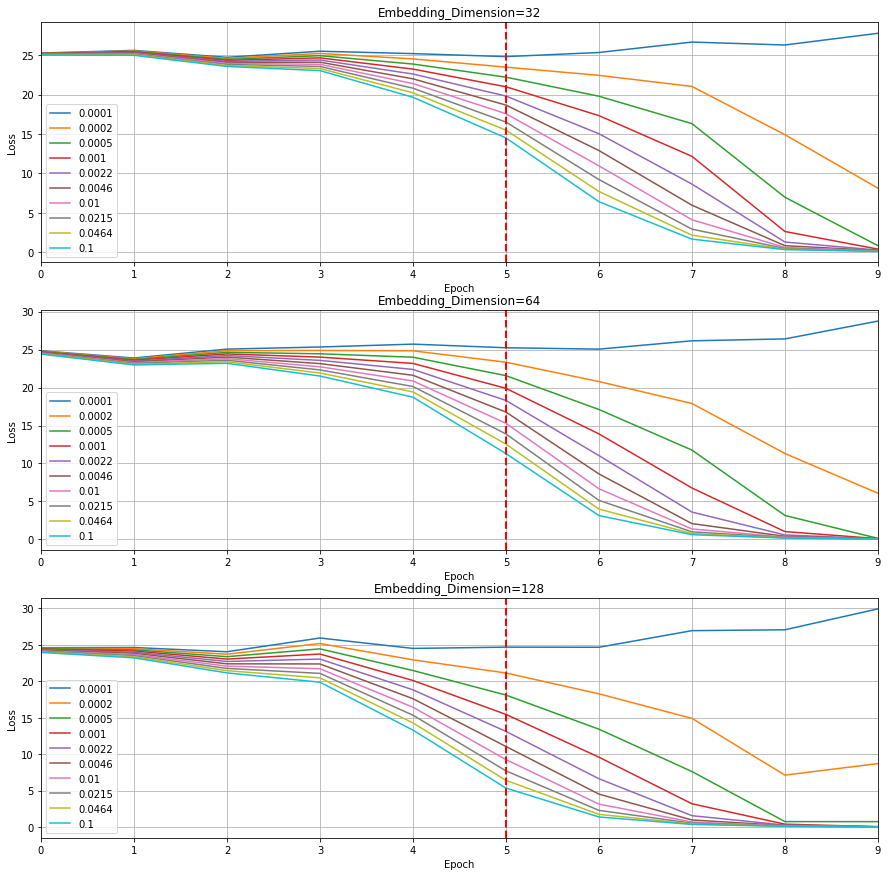

In [7]:
import matplotlib.pyplot as plt

# The size of the entire output figure
plt.figure(figsize=(15,15))

# Plot a figure for each embedding dimensions
for i in range(len(EMBEDDING_DIMENSIONS)):
    # Get the dimension number
    d = list(data.keys())[i]

    # Generate the sub-figure canvas
    plt.subplot(311+i)

    # Plot the losses for the dimension
    plt.plot(data[d])

    # Plot a vartical line for comparison
    plt.axvline(5, linewidth=2, linestyle='--', color='r')

    # PyPlot settings
    plt.xticks(range(0,10))
    plt.xlim((0,9))
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.title(f'Embedding_Dimension={d}')
    plt.legend([round(i,4) for i in LEARNING_RATES])

plt.show()

- To summarize, 
    - All three embedding dimensions sizes struggle with small leanring rate, the optimizer crawling near the local peaks and creeks makes the model underperform.
    - With appropriate learning rate set up, higher embedding dimensions seems to be able to achieve local optimum faster
        - As shown by the dashed red line on Epoch 5, dimension 128 with lr=0.1 has decreased loss to about 6, whereas dimension 32 with lr=0.1 still at 15.
    - There is a weird increase of loss at the beginning of the training for dimension 32 (epoch 0 and 1) but I don't know how to interpret it.

#### Question 3

(**45 marks**) Training an n-gram language model could be achieved by predicting the word given its n-gram elements. This idea is pretty similar to the Continuous Bag of Words (**CBOW**). Given the text 
```
There is an apple on the table
```
**CBOW** predicts the word apple given the context of a few words before (*is*, *an*) and a few words after (*on*, *the*) the target word. In contrast, the **Skip-gram** uses the central word *apple* to predict the context (*is*, *an*, *on*, *the*).
The **CBOW** model is as follow. Given a target word $w$, and an $N$ context window on each side $w_{i-1},\dots,w_{i-N}$ and $w_{i+1},\dots,w_{i+N}$. Referring to all context words collectively as $C$, it tries to minimize the objective: $$-\log p(w_i|C)=-\log\big(\operatorname{softmax}(A\sum_{w\in C}(q_w)+b)\big)$$where $q_w$ is the embedding of word $w$.

**Q3a.** Please use the text and Language Modeler provided in Question 2 to train a **CBOW** model with a fixed window size of 2. (**15 marks**)


**My answer:**

- Firstly, I will define some constants per requests by the questions.
    - Setting CONTEXT_SIZE equal to 4. According to the definition provided above, the context of a target word $w_t$ would be $C= [w_{t-2}, w_{t-1}, w_{t+1}, w{t+2}]$.
- Some data preparation has already been done in the Q2:
    - The vocabulary set *vocabulary*.
    - The vocabulary indices dictionary *index*.
    - The splitted input sentence in list *test_sentence*.
- The processed bag of words will be stored in a list named *bag_of_words*.

In [8]:
import warnings
from pprint import pprint

# Define Constants
CONTEXT_SIZE = 4
assert(not (CONTEXT_SIZE % 2))

# Decorator function that catches index error
def wrap_index_error(func):
    def wrapped_func(*args, **kwargs):
        try:
            func_response = func(*args, **kwargs)
        except IndexError:
            func_response = warnings.warn(
                f"\033[0;31m Invalid Context Size {CONTEXT_SIZE}. \033[0;0m"
                )
        return func_response
    return wrapped_func

# Helper function that returns a list of context words 
# given the index of a target word and CONTEXT_SIZE
@wrap_index_error
def extract_context(sequence, index, size):
    context = []
    for i in range(1, size+1):
        context.extend([sequence[index-i], sequence[index+i]])
    return context
        
# Build up the bag of words
bag_of_words = [
    (extract_context(test_sentence, i, CONTEXT_SIZE//2), test_sentence[i])
    for i in range(2, test_sentence_length-2)
    ]

# Check the validity of the result
assert(bag_of_words[0][0])
pprint(bag_of_words)

[(['physical', 'of', 'the', 'both'], 'meanings'),
 (['meanings', 'both', 'physical', 'the'], 'of'),
 (['of', 'the', 'meanings', 'complex-valued'], 'both'),
 (['both', 'complex-valued', 'of', 'entity'], 'the'),
 (['the', 'entity', 'both', 'and'], 'complex-valued'),
 (['complex-valued', 'and', 'the', 'word'], 'entity'),
 (['entity', 'word', 'complex-valued', 'embeddings'], 'and'),
 (['and', 'embeddings', 'entity', 'is'], 'word'),
 (['word', 'is', 'and', 'unknown'], 'embeddings')]


- Now I will start training:
    - Same setup as in Q2c. NLLLoss for metrics and SGD to optimize.
    - Same training procedure as in Q2c.

In [9]:
losses = []
loss_function = nn.NLLLoss()
model = LanguageModeler(vocab_size=vocabulary_length,
                        embedding_dim=EMBEDDING_DIMENSIONS[-1], # EMBEDDING_DIMENSIONS = [32, 64, 128] from Q2c
                        context_size=CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=1e-2)

[22.621014833450317,
 15.822613000869751,
 10.934432864189148,
 7.178242623806,
 4.555471122264862,
 2.9261764883995056,
 1.9994178116321564,
 1.4571707844734192,
 1.1212550774216652,
 0.9000676348805428]


Text(0.5, 1.0, 'CBOW with ED=128 LR=0.01')

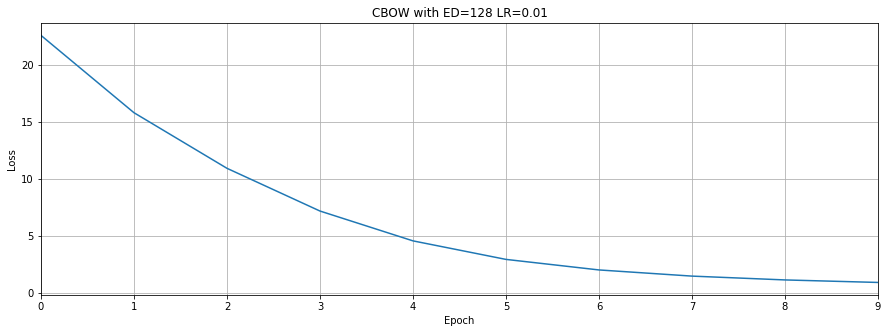

In [10]:
# Copy from Q2c and modified.
for epoch in range(EPOCH): # EPOCH = 10

    total_loss = 0

    for context, target in bag_of_words:

        # Clear gradient accumulated
        model.zero_grad()

        # Forward pass
        log_probs = model(
            torch.tensor([index[w] for w in context], dtype=torch.long)
            )

        # Compute loss
        loss = loss_function(
            log_probs, 
            torch.tensor([index[target]], dtype=torch.long)
            )
        
        # Backpropagate and update weights
        loss.backward()
        optimizer.step()

        # Sums up loss for this epoch
        total_loss += loss.item()

    # Record total epoch loss
    losses.append(total_loss)

# Display training losses
pprint(losses)

plt.figure(figsize=(15, 5))
plt.plot(losses)

# Pyplot Settings
plt.grid()
plt.xticks(range(0, EPOCH))
plt.xlim(0,9)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CBOW with ED=128 LR=0.01')

**Q3b.** Please use the text and Language Modeler provided in Question 2 to train a skip-gram model. (**15 marks**)


**My answer:**

- Since the question has not defined context size, I will assume it to be the same as the size used in Q2a CBOW training, Which is *CONTEXT_SIZE=4*.
- As usual, some variables are defined at the beginning of the assigments, I will annotate them for readibility.
- Firstly, I will create the *skip_grams*, which is a list storing all possible combination of (context, target) pair given the *CONTEXT_SIZE*. 
    - Note that the context is now a single center word, and the target is the history and future words around the center word. 


In [11]:
# Create the (context word, center word) pair given the context size
@wrap_index_error
def extract_target(list_words, idx):
    start = idx-(CONTEXT_SIZE//2) if (idx-(CONTEXT_SIZE//2)) > 0 else 0
    stop = idx+(CONTEXT_SIZE//2)+1 
    return list_words[start:idx] + list_words[idx+1:stop]

skip_grams = [
    (test_sentence[i], extract_target(test_sentence, i)) for i in range(test_sentence_length) 
    ]
pprint(skip_grams)

[('the', ['physical', 'meanings']),
 ('physical', ['the', 'meanings', 'of']),
 ('meanings', ['the', 'physical', 'of', 'both']),
 ('of', ['physical', 'meanings', 'both', 'the']),
 ('both', ['meanings', 'of', 'the', 'complex-valued']),
 ('the', ['of', 'both', 'complex-valued', 'entity']),
 ('complex-valued', ['both', 'the', 'entity', 'and']),
 ('entity', ['the', 'complex-valued', 'and', 'word']),
 ('and', ['complex-valued', 'entity', 'word', 'embeddings']),
 ('word', ['entity', 'and', 'embeddings', 'is']),
 ('embeddings', ['and', 'word', 'is', 'unknown']),
 ('is', ['word', 'embeddings', 'unknown']),
 ('unknown', ['embeddings', 'is'])]


- Again, the same procedure:

In [12]:
losses = []
loss_function = nn.NLLLoss()
model = LanguageModeler(vocab_size=vocabulary_length,
                        embedding_dim=EMBEDDING_DIMENSIONS[-1], # EMBEDDING_DIMENSIONS = [32, 64, 128] from Q2c
                        context_size=CONTEXT_SIZE//CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=1e-2)

[34.76306438446045,
 32.33031892776489,
 30.455970406532288,
 28.89207673072815,
 27.5333172082901,
 26.350956201553345,
 25.373981595039368,
 24.592997789382935,
 23.94580376148224,
 23.51597762107849]


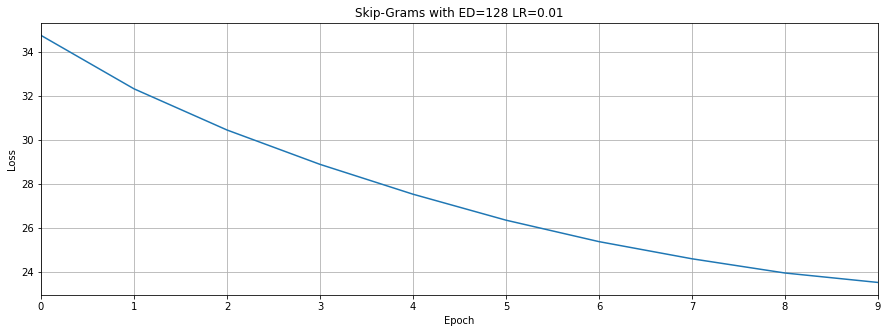

In [13]:
# Copy from Q2c and modified.
for epoch in range(EPOCH): # EPOCH = 10

    total_loss = 0

    for context, target in skip_grams:

        for w in target:

            # Clear gradient accumulated
            model.zero_grad()

            # Forward pass
            log_probs = model(
                torch.tensor([index[context]], dtype=torch.long)
                )

            # Compute loss
            loss = loss_function(
                log_probs, 
                torch.tensor([index[w]], dtype=torch.long)
                )
        
            # Backpropagate and update weights
            loss.backward()
            optimizer.step()

        # Sums up loss for this epoch
        total_loss += loss.item()

    # Record total epoch loss
    losses.append(total_loss)

# Display training losses
pprint(losses)

plt.figure(figsize=(15, 5))
plt.plot(losses)

# Pyplot Settings
plt.grid()
plt.xticks(range(0, EPOCH))
plt.xlim(0,9)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Skip-Grams with ED=128 LR=0.01')
plt.show()

- The training Loss of Skip-gram is not so good compared to that of CBOW. My educated guesses are:
    - Data size is too small, only one sentence with 13 words.
    - Maybe increase batch size from 1 to a larger number.
    - Negative Sampling/Hierarchical Softmax maybe necessary.

**Q3c.** Please use the given Wikipedia corpus and the language model to train a **CBOW/Skip-gram** model, and comparethe word similarities among semantically closed word pairs, such as {woman, man, men}. (**15 marks**)


**My answer:** I am going to train a CBOW model.

- Firstly, I will define a Text2Dataset class, which can be use by the DataLoader class to feeding data into model.
- The plain text data will be read in then tokenized and cleaned up a bit.
    - English stopwords will get removed from the dataset.
    - Punctuations will remained I don't want the model to learn different representations of the same word with every possible punctuation.
- Override the getitem() and len() so that DataLoader can get features and label in a correct tensor format.

In [14]:
from torch.utils.data import Dataset, DataLoader
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class Text2Dataset(Dataset):

    def __init__(self, path, window_size=2):

        # the window size that defined with CBOW
        self.window_size = window_size

        # Open the file
        # Then read in the plain text data
        with open(path, 'r', encoding='utf-8') as f:
            text = f.read().lower()

        # Stopwords database provided by nltk 
        stop_words = set(stopwords.words('english'))

        # Tokenize the plain text data
        # and remove stopwords and punctuations
        tokenized_text = [
            w for w in word_tokenize(text) if w not in stop_words
        ]

        # Close the file
        f.close()

        # Create the list of (context, target) pairs needed for CBOW
        # by iterate through the tokenized_text
        self.context_target = []
        for i in range(self.window_size, len(tokenized_text)-self.window_size):
            context = []
            for j in range(1, self.window_size+1):
                context.extend([tokenized_text[i-j], tokenized_text[i+j]])
            self.context_target.append((context, tokenized_text[i]))

        # The vocabulary and its size
        self.vocab = set(tokenized_text)
        self.vocab_size = len(self.vocab)

        # The word to index dictionary
        self.index = {w:i for i, w in enumerate(self.vocab)}

    def __getitem__(self, i):

        context_tensor = torch.tensor(
            [self.index[w] for w in self.context_target[i][0]], 
            dtype=torch.long
        )

        target_tensor = torch.tensor(
            [self.index[self.context_target[i][1]]],
            dtype=torch.long
        )

        return context_tensor, target_tensor

    def __len__(self): return len(self.context_target)


- Next, I will define some constants and prepare for Training.
- Same setup as before but this time I will use my GPU. 
    - Since the dataset is not so tiny anymore, the training efficiency provided by CUDA is not neglectable anymore.

In [15]:
testing = True

# Define some constants
PATH = './test.txt' if testing else './wiki_corpus.txt'
EPOCH = 10
BATCH_SIZE = 1
CONTEXT_SIZE = 4
EMBEDDING_DIMENSION = 128
LEARNING_RATE = 1e-2

# Check if a GPU is available
cuda_available = torch.cuda.is_available()

# Load the data
data = Text2Dataset(PATH)

# Load the model provided in Q2.
model = LanguageModeler(
    vocab_size=data.vocab_size, 
    embedding_dim=EMBEDDING_DIMENSION, 
    context_size=CONTEXT_SIZE
)

# Same optimizer and loss function as in Q2/Q3a/Q3b
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
loss_function = nn.NLLLoss()

# The data loader iterate through the data
data_loader = DataLoader(data, batch_size=BATCH_SIZE)


- Now I will start training
    - tqdm is used to keep track of progress.
    - Others are exactly the same as before.

In [16]:
from tqdm import tqdm

# Record of the training loss for each epoch
losses = []

for epoch in range(EPOCH):
    
    # Total training loss for a epoch
    total_loss = 0

    for context, target in tqdm(data_loader):

        # Move data and model to GPU if it is available
        if cuda_available:
            context = context.cuda()
            target = target.squeeze(1).cuda()
            model = model.cuda()

        # Clear gradient accumulated from last iteration
        model.zero_grad()

        # Forward Pass
        log_probs = model(context)

        # Compute Loss
        loss = loss_function(log_probs, target)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Record Loss
        total_loss += loss.item()

    # Sums up
    losses.append(total_loss)
    

100%|██████████| 265/265 [00:00<00:00, 411.95it/s]


[5.281877905467771,
 4.250847788773617,
 3.363518467264355,
 2.4187065796258875,
 1.437095873261679,
 0.6463187789052444,
 0.26243669920653667,
 0.1363612204315668,
 0.08989014415386713,
 0.06709143355453633]


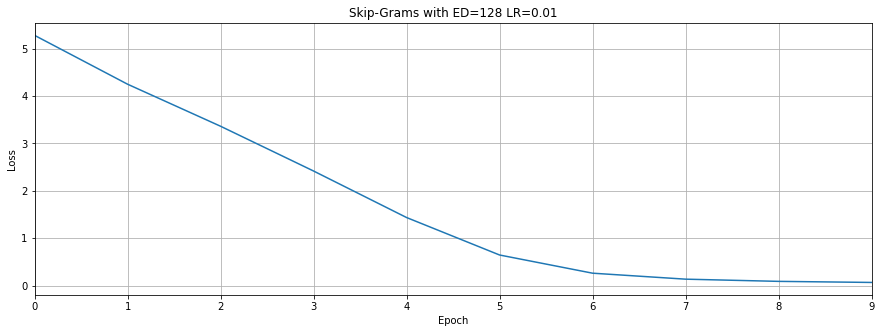

In [17]:
# Display training losses
average_losses = [l/len(data.context_target) for l in losses]
pprint(average_losses)

plt.figure(figsize=(15, 5))
plt.plot(average_losses)

# Pyplot Settings
plt.grid()
plt.xticks(range(0, EPOCH))
plt.xlim(0,9)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Skip-Grams with ED=128 LR=0.01')
plt.show()

- For the comparison, I will use dimenionality reduction technique to map word-embeddings in $\mathbb{R}^{128}$ onto $\mathbb{R}^2$ for visualization.
    - Use PCA to reduce the number of dimension to a reasonable amount first, i.e. 32 first. 
        - According to the documentation. Doing so wil suppress some noise and speed up the pairwise computation.
    - Then use t-SNE to converts similarities between data points to join probabilities and tries to minimize the KL-divergence between the joint probabilities of the low-dimensional embedding and high-dimensional data generated by PCA.

In [18]:
from sklearn.manifold import TSNE

warnings.simplefilter(action='ignore', category=FutureWarning)

weights = model.embeddings.weight.cpu().detach().numpy()

weights_pca_tsne = TSNE(
    n_components=2,
    init='pca',
    learning_rate='auto',
    verbose=1,
    n_jobs=-1
).fit_transform(weights)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203 samples in 0.000s...
[t-SNE] Computed neighbors for 203 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 203 / 203
[t-SNE] Mean sigma: 3.404301
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.852905
[t-SNE] KL divergence after 1000 iterations: 1.338832


In [20]:
plt.figure(figsize=(33, 33))
plt.rcParams.update({'font.size': 33})

# Get the x and y inputs for all words
x = weights_pca_tsne[:,0]
y = weights_pca_tsne[:,1]
plt.scatter(x, y)

if not testing:
    # Highlight the data points for words: spring, autumn, women, and man
    spring_x, spring_y = weights_pca_tsne[data.index['spring']]
    autumn_x, autumn_y = weights_pca_tsne[data.index['autumn']]
    women_x, women_y = weights_pca_tsne[data.index['women']]
    men_x, men_y = weights_pca_tsne[data.index['men']]

    plt.scatter(spring_x, spring_y, s=500, c='red', label='spring')
    plt.scatter(autumn_x, autumn_y, s=500, c='purple', label='autumn')
    plt.scatter(men_x, men_y, s=500, c='pink', label='women')
    plt.scatter(women_x, women_y, s=500, c='orange', label='men')

# Pyplot settings
plt.legend(loc='upper left')
plt.show()

- Very Interesting, according to the plot above, the leanred word embedding puts *women* and *men* close to each other, which is reasonable, while put *autumn* and *spring* relatively far away from each other. 
- Let's check the cosine distance of the original weights 

In [21]:
from scipy import spatial

if not testing:
    words = ['autumn', 'spring', 'women', 'men']
    consine_distances = []
    for i in range(len(words)-1):
        wi = weights[data.index[words[i]]]
        for j in range(i+1, len(words)):
            wj = weights[data.index[words[j]]]
            consine_distances.append((
                f"{words[i]} vs. {words[j]}",
                spatial.distance.cosine(wi, wj)
            ))

    pprint(sorted(consine_distances, key=lambda x:x[1]))


- Honestly, I am a little bit confused but maybe that is because the word *spring* have other commonly used meaning, for example in line 3502 of the corpus:
```
She was a Spring (part of the Progressive Alliance of Socialists and Democrats group) Member of the European Parliament (MEP) elected in the 2019 European parliamentary election.
```
- Here, we as human can easily understand that the word *Spring* here is a name of a membership in a organization or something like that, which also has the underlying meaning referring to the first season of the year.
- However, the context given here is clearly affecting the judgement of the model.

#### Question 4

(**20 marks**) Splitting a text into smaller chunks is a task that is harder than it looks, and there are multiple ways of doing so.

**Q4a.** Given the text:
```
Peter is too old to do this work, Marry is older than Peter, John is oldest one however he is still doing this work.
```
A simplest, way to tokenize this text is splitting by spaces, However, there are also some disadvantages of this simple method. Please list at least two disadvantages and explain them.

**My answer**: This method of splitting texts comes under the category of word tokenization. It has a few disadvantages:
- It is generally not good at dealing with out of vocabulary words, which are the new words encountered at testing stage. Even though this problem can be avoid by mapping to unkonwn token, but it brings upon another issue that every out of vocabulary word gets the same representation.
- It also treat words like *boy* and *boys*, which are almost the same words in English, differently. Also it assumes that no words are mispelled, which is highly unlikely in practice.
- If a vocabulary is goind to be built subsequently, then this methods could result in a space-comsuming size of vocabulary.

**Q4b.** Transformers models use a hybrid approach between word-level and character-level tokenization called subword tokenization. BPE (Byte-Pair Encoding) is a subword-level tokenization approach introduced in *Neural Machine Translation of Rare Words with Subword Units (Sennrich et al., 2015)*. BPE relies on a pre-tokenizer that splits the training data into words. Pretokenization can be as simple as space tokenization. Let us assume that after pre-tokenization, the following set of words including their frequency has been determined:
```
(old, 10), (older, 5), (oldest, 8), (hug, 8), (pug, 4), (hugs, 5)
``` 
Then we obtain an base vocabulary:
```
{o, l, d, e, r, s, t, h, u, g, p}
```
Splitting all words into symbols in the base vocabulary, we obtained:
```
(o,l,d, 10), (o,l,d,e,r, 5), (o,l,d,e,s,t, 8), (h,u,g, 8), (p,u,g, 4), (h,u,g,s, 5)
```
BPE then counts the frequency of each possible symbol pair and picks the symbol pair that occurs most frequently. In the above example, "o" followed by "l" is presented 10+5+8=23 times. Thus, the first merge rule the tokenizer learns is to group all "o" symbols with an "l" symbol. Next, "ol" is added to the vocabulary. The set of words then becomes:
```
(ol,d, 10), (ol,d,e,r, 5), (ol,d,e,s,t, 8), (h,u,g, 8), (p,u,g, 4), (h,u,g,s, 5)
```
This process will run iteratively. The vocabulary size, i.e. the base vocabulary + the number of merges, is a hyperparameter to choose. The learned merge rules would then be applied to new words (as long as those new words do not include symbols that were not in the base vocabulary). The word not in the base vocabualary would be represented as "[unk]". Implement this BPE tokenizer, set the vocabulary size as 16 and train this BPE tokenizer to finish the iterative process. Use the trained tokenizer to tokenize the words below: (**15 marks**)
```
{old, oldest, older, nug, gug, huggingface}
```

**My answer:**


In [27]:
from collections import OrderedDict
from itertools import chain

class BPEtokenizer():

    def __init__(self, corpus, vocab_size):
        self.corpus = corpus
        self.vocab = {}

    def tokenize(self, corpus):
        pass

In [31]:
VOCABULARY_SIZE = 16

train = [
    ['old']*10, ['oldest']*5, ['older']*8, 
    ['nug']*8, ['gug']*4, ['huggingface']*5
]

bpe = BPEtokenizer(corpus=words, vocab_size=VOCABULARY_SIZE)
bpe.vocab

train

[['old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old', 'old'],
 ['oldest', 'oldest', 'oldest', 'oldest', 'oldest'],
 ['older', 'older', 'older', 'older', 'older', 'older', 'older', 'older'],
 ['nug', 'nug', 'nug', 'nug', 'nug', 'nug', 'nug', 'nug'],
 ['gug', 'gug', 'gug', 'gug'],
 ['huggingface', 'huggingface', 'huggingface', 'huggingface', 'huggingface']]